In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('C:/Users/atalb/Documents/Coding/MLandAI/MLPracticeExercises/Datasets/Titanic/train.csv')
test_data = pd.read_csv('C:/Users/atalb/Documents/Coding/MLandAI/MLPracticeExercises/Datasets/Titanic/test.csv')

train_data.head()



PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [38]:
# Combine the two dataset (this helps to make sure that they will stay consistent after implementing feature engineering)
# Add a column to indicate the dataset type
train_data["DatasetType"] = "train"
test_data["DatasetType"] = "test"

# Combine train and test
combined_data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

In [39]:
def data_overview(df, head_rows=5):
    """
    Provides a comprehensive overview of a DataFrame, including:
    - Shape of the DataFrame
    - First few rows (default 5)
    - Info (data types, non-null counts)
    - Basic descriptive statistics
    - Missing values (count and percentage)
    - Duplicate rows count
    - Number of unique values and the unique values for each column
    """
    print("======== DATA OVERVIEW ========")
    print(f"\n1. Shape of DataFrame: {df.shape[0]} rows, {df.shape[1]} columns\n")

    print(f"2. First {head_rows} Rows:\n")
    display(df.head(head_rows))

    print("\n3. DataFrame Info:\n")
    print(df.info())

    print("\n4. Descriptive Statistics (Numerical Columns):\n")
    print(df.describe().transpose())

    print("\n5. Missing Values Count and Percentage:\n")
    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_data = pd.DataFrame({
        'Missing Count': missing_values,
        'Missing Percentage (%)': missing_percentage
    })
    missing_data = missing_data[missing_data["Missing Count"] > 0].sort_values(by='Missing Percentage (%)', ascending=False)
    
    if not missing_data.empty:
        display(missing_data)
    else:
        print("No missing values")

    print("\n6. Duplicate Rows Count:\n")
    duplicate_count = df.duplicated().sum()
    print(f"{duplicate_count} duplicate rows found\n" if duplicate_count > 0 else "No duplicate rows found\n")

    print("\n7. Number of Unique Values per Column:\n")
    unique_counts = df.nunique()
    unique_values = {col: df[col].unique() for col in df.columns}
    for col in unique_counts.index:
        print(f"{col}: {unique_counts[col]} unique values")
        if unique_counts[col] <= 10:  # Print unique values only if there are <= 10 unique values for readability
            print(f"   Unique Values: {unique_values[col]}\n")
        else:
            print("   Too many unique values to display\n")

  


In [41]:
data_overview(combined_data)


======== DATA OVERVIEW ========

1. Shape of DataFrame: 1309 rows, 13 columns

2. First 5 Rows:



PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked DatasetType  
0      0         A/5 21171   7.2500   NaN        S       train  
1      0          PC 17599  71.2833   C85        C       train  
2      0  STON/O2. 3101282   7.9250   NaN        S       train  
3      0            113803  53.1000  C123        S       train  
4      0            373450   8.0500   NaN        S       train


3. DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  DatasetType  1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB
None

4. Descriptive Statistics (Numerical Columns):

              count        mean         std   min       25%       50%  \
PassengerId  1309.0  655.000000  378.020061  1.00  

Missing Count  Missing Percentage (%)
Cabin              1014               77.463713
Survived            418               31.932773
Age                 263               20.091673
Embarked              2                0.152788
Fare                  1                0.076394


6. Duplicate Rows Count:

No duplicate rows found


7. Number of Unique Values per Column:

PassengerId: 1309 unique values
   Too many unique values to display

Survived: 2 unique values
   Unique Values: [ 0.  1. nan]

Pclass: 3 unique values
   Unique Values: [3 1 2]

Name: 1307 unique values
   Too many unique values to display

Sex: 2 unique values
   Unique Values: ['male' 'female']

Age: 98 unique values
   Too many unique values to display

SibSp: 7 unique values
   Unique Values: [1 0 3 4 2 5 8]

Parch: 8 unique values
   Unique Values: [0 1 2 5 3 4 6 9]

Ticket: 929 unique values
   Too many unique values to display

Fare: 281 unique values
   Too many unique values to display

Cabin: 186 unique values
   Too many unique values to display

Embarked: 3 unique values
   Unique Values: ['S' 'C' 'Q' nan]

DatasetType: 2 unique values
   Unique Values: ['train' 'test']



In [43]:
# Converting data types
combined_data['Survived'] = combined_data['Survived'].astype('category')
combined_data['Pclass'] = combined_data['Pclass'].astype('category')
combined_data['Sex'] = combined_data['Sex'].astype('category')
combined_data['Cabin'] = combined_data['Cabin'].astype('category')
combined_data['Embarked'] = combined_data['Embarked'].astype('category')
combined_data['Name'] = combined_data['Name'].astype('category')
combined_data['Ticket'] = combined_data['Ticket'].astype('category')
combined_data['DatasetType'] = combined_data['DatasetType'].astype('category')
combined_data['PassengerId'] = combined_data['PassengerId'].astype('category')

combined_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   category
 1   Survived     891 non-null    category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   category
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   category
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    category
 11  Embarked     1307 non-null   category
 12  DatasetType  1309 non-null   category
dtypes: category(9), float64(2), int64(2)
memory usage: 188.4 KB


In [44]:
import re
# Function to extract title from the Name
def extract_title(Name):
    title_search = re.search(r',\s*([^\.]*)\.', Name)
    if title_search:
        return title_search.group(1).strip()
    return ""

# Function to extract family name from the Name
def extract_family_name(Name):
    family_name = Name.split(",")[0].strip()
    return family_name

# Create new columns for Title and Family Name
combined_data["Title"] = combined_data["Name"].apply(extract_title).astype('category')
combined_data["FamilyName"] = combined_data["Name"].apply(extract_family_name).astype('category')

# check the new columns
print(combined_data["Title"].unique())
print(combined_data["FamilyName"].unique())

['Mr', 'Mrs', 'Miss', 'Master', 'Don', ..., 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona']
Length: 18
Categories (18, object): ['Capt', 'Col', 'Don', 'Dona', ..., 'Ms', 'Rev', 'Sir', 'the Countess']
['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', ..., 'Naughton', 'Henriksson', 'Spector', 'Oliva y Ocana', 'Saether']
Length: 875
Categories (875, object): ['Abbing', 'Abbott', 'Abelseth', 'Abelson', ..., 'de Pelsmaeker', 'del Carlo', 'van Billiard', 'van Melkebeke']


In [45]:
# Grouping titles into broader categories
def encode_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title  # Keep common titles as they are
    elif title in ['Mlle', 'Ms']:  # Alternative spellings for Miss
        return 'Miss'
    elif title in ['Mme']:  # Alternative spelling for Mrs
        return 'Mrs'
    elif title in ['Dr', 'Major', 'Col', 'Capt', 'Rev']:
        return 'Officer'  # Group into an 'Officer' category
    elif title in ['Don', 'Sir', 'the Countess', 'Lady', 'Jonkheer']:
        return 'Noble'  # Group into a 'Noble' category
    else:
        return 'Other'  # Catch-all for any unusual titles

# Apply title encoding
combined_data["TitleEncoded"] = combined_data["Title"].apply(encode_title).astype('category')

# Check the new column
combined_data["TitleEncoded"].unique()

['Mr', 'Mrs', 'Miss', 'Master', 'Noble', 'Officer', 'Other']
Categories (7, object): ['Master', 'Miss', 'Mr', 'Mrs', 'Noble', 'Officer', 'Other']

In [46]:
# Create a "FamilySize" feature by summing SibSp (siblings/spouses) and Parch (parents/children) plus 1 (the individual themselves)
combined_data["FamilySize"] = combined_data["SibSp"] + combined_data["Parch"] + 1

# Create a "FamilyGroup" feature based on FamilySize
def categorize_family_size(size):
    if size == 1:
        return "Solo"  # No family members on board
    elif size <= 4:
        return "Small"  # Small family (1-3 additional members)
    else:
        return "Large"  # Large family (4+ additional members)

combined_data["FamilyGroup"] = combined_data["FamilySize"].apply(categorize_family_size).astype('category')

# Check the new column
combined_data["FamilyGroup"].unique()

['Small', 'Solo', 'Large']
Categories (3, object): ['Large', 'Small', 'Solo']

In [47]:
# Create a numeric family size category based on the actual number of family members
def numeric_family_size_category(size):
    if size == 1:
        return 0  # Solo travelers (no family)
    elif size <= 4:
        return 1  # Small family
    else:
        return 2  # Large family

# Create a new column for numeric family size category
combined_data["NumericFamilySize"] = combined_data["FamilySize"].apply(numeric_family_size_category).astype('int')

# Check the new column
combined_data["NumericFamilySize"].unique()

array([1, 0, 2])

In [48]:
# Function to categorize passenger as "Wealthy", "Middle", "Low", or "Employee"
combined_data["TicketPrefix"] = combined_data["Ticket"].apply(lambda x: x.split(" ")[0] if not x.isdigit() else "None")

def classify_status(row):
    if row["Fare"] == 0 or row["TicketPrefix"] in ["LINE", "W.E.P.", "A/5", "A/4"]:
        return "Employee"  # Likely crew members or service roles
    elif row["Pclass"] == 1 and row["Fare"] > 100:
        return "Wealthy"  # High-paying first-class passengers
    elif row["Pclass"] == 2 or (row["Pclass"] == 1 and row["Fare"] <= 100):
        return "Middle"  # Middle-class or modest first-class passengers
    else:
        return "Low"  # Third-class passengers or immigrants

# Apply the classification function to create a new column
combined_data["PassengerStatus"] = combined_data.apply(classify_status, axis=1).astype('category')

# Check the new column
combined_data["PassengerStatus"].unique()


['Employee', 'Middle', 'Low', 'Wealthy']
Categories (4, object): ['Employee', 'Low', 'Middle', 'Wealthy']

In [49]:
# Function to further classify passenger status
def detailed_classify_status(row):
    ticket_prefix = row["TicketPrefix"]
    fare = row["Fare"]
    pclass = row["Pclass"]

    # Check for specific immigrant patterns (common third-class ticket prefixes and low fares)
    if ticket_prefix in ["STON/O", "A/5", "A/4", "SOTON/O.Q.", "SOTON/OQ", "SC/AH", "C.A./SOTON", "A.5."] or fare < 10:
        return "Migrant"  # Likely immigrants or low-income passengers

    # Identify service crew members based on specific ticket patterns or zero fares
    if fare == 0 or ticket_prefix in ["LINE", "W.E.P.", "SW/PP", "S.C./A.4.", "P/PP"]:
        return "Crew"  # Crew members with assigned tickets

    # High-paying first-class with luxury tickets
    if pclass == 1 and fare > 100:
        return "Wealthy Passenger"

    # Second-class or modest-paying first-class passengers
    if pclass == 2 or (pclass == 1 and fare <= 100):
        return "Middle-Class Passenger"

    # Default to low-class passengers if none of the above match
    return "Low-Class Passenger"

# Apply the detailed classification function
combined_data["DetailedPassengerStatus"] = combined_data.apply(detailed_classify_status, axis=1).astype('category')

# Check the new column
combined_data["DetailedPassengerStatus"].unique()

['Migrant', 'Middle-Class Passenger', 'Low-Class Passenger', 'Wealthy Passenger', 'Crew']
Categories (5, object): ['Crew', 'Low-Class Passenger', 'Middle-Class Passenger', 'Migrant', 'Wealthy Passenger']

In [50]:
# GroupSize: Number of passengers sharing the same ticket
combined_data["GroupSize"] = combined_data.groupby("Ticket")["Ticket"].transform("count").astype('int')

# Check the new column
combined_data["GroupSize"].unique()

array([ 1,  2,  5,  3,  7,  6,  4,  8, 11])

In [51]:
# Age Binning: Categorize age into groups
def categorize_age(age):
    if pd.isna(age):
        return "Unknown"
    elif age <= 12:
        return "Child"
    elif age <= 19:
        return "Teen"
    elif age <= 59:
        return "Adult"
    else:
        return "Senior"

combined_data["AgeGroup"] = combined_data["Age"].apply(categorize_age).astype('category')

# Check the new column
combined_data["AgeGroup"].unique()


['Adult', 'Unknown', 'Child', 'Teen', 'Senior']
Categories (5, object): ['Adult', 'Child', 'Senior', 'Teen', 'Unknown']

In [53]:
# Ensure "Unknown" is added to the categories of the 'Cabin' column
if combined_data["Cabin"].dtype.name == "category":
    combined_data["Cabin"] = combined_data["Cabin"].cat.add_categories(["Unknown"])
    
# Deck Extraction: Extract the first letter of the cabin (or "Unknown" if missing)
combined_data["Deck"] = combined_data["Cabin"].fillna("Unknown").apply(lambda x: x[0]).astype('category')

# Check the new column
combined_data["Deck"].unique()


['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']
Categories (9, object): ['A', 'B', 'C', 'D', ..., 'F', 'G', 'T', 'U']

In [54]:
# IsAlone: Boolean feature indicating whether the passenger is traveling alone
combined_data["IsAlone"] = combined_data["FamilySize"].apply(lambda x: 1 if x == 1 else 0).astype('category')

# Check the new column
combined_data["IsAlone"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [55]:
# FarePerPerson: Calculate fare per person
combined_data["FarePerPerson"] = combined_data["Fare"] / combined_data["GroupSize"]

# Check the new column
combined_data["FarePerPerson"].mean()

14.757627255351684

In [56]:
# Name Length: Calculate the length of the passenger's name
combined_data["NameLength"] = combined_data["Name"].apply(len).astype('int')

# Check the new column
combined_data["NameLength"].unique()

array([23, 51, 22, 44, 24, 16, 30, 49, 35, 31, 27, 36, 32, 20, 28, 55, 21,
       29, 57, 19, 46, 34, 56, 40, 17, 25, 45, 26, 50, 13, 15, 33, 18, 52,
       47, 38, 37, 41, 14, 42, 39, 82, 48, 54, 43, 67, 65, 53, 61, 12, 59,
       62, 58, 63])

In [57]:
# Port of Embarkation Encoding: Encoding the port of embarkation
port_mapping = {"C": "Cherbourg", "S": "Southampton", "Q": "Queenstown"}
combined_data["EmbarkedCategory"] = combined_data["Embarked"].map(port_mapping).astype('category')

# Check the new column
combined_data["EmbarkedCategory"].unique()

['Southampton', 'Cherbourg', 'Queenstown', NaN]
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']

In [58]:
# Interaction Terms: Create combined features
combined_data["Pclass_Fare"] = combined_data["Pclass"].astype(float) * combined_data["Fare"].astype(float)
combined_data["Title_AgeGroup"] = combined_data["TitleEncoded"].astype(str) + "_" + combined_data["AgeGroup"].astype(str)
combined_data['Title_AgeGroup'] = combined_data['Title_AgeGroup'].astype('category')

# Check the new columns
print(combined_data["Title_AgeGroup"].unique())
print(combined_data["Pclass_Fare"].head())

['Mr_Adult', 'Mrs_Adult', 'Miss_Adult', 'Mr_Unknown', 'Master_Child', ..., 'Officer_Senior', 'Mr_Child', 'Officer_Unknown', 'Master_Teen', 'Other_Adult']
Length: 22
Categories (22, object): ['Master_Child', 'Master_Teen', 'Master_Unknown', 'Miss_Adult', ..., 'Officer_Adult', 'Officer_Senior', 'Officer_Unknown', 'Other_Adult']
0    21.7500
1    71.2833
2    23.7750
3    53.1000
4    24.1500
Name: Pclass_Fare, dtype: float64


In [60]:
combined_data.isnull().sum()


PassengerId                   0
Survived                    418
Pclass                        0
Name                          0
Sex                           0
Age                         263
SibSp                         0
Parch                         0
Ticket                        0
Fare                          1
Cabin                      1014
Embarked                      2
DatasetType                   0
Title                         0
FamilyName                    0
TitleEncoded                  0
FamilySize                    0
FamilyGroup                   0
NumericFamilySize             0
TicketPrefix                  0
PassengerStatus               0
DetailedPassengerStatus       0
GroupSize                     0
AgeGroup                      0
Deck                          0
IsAlone                       0
FarePerPerson                 1
NameLength                    0
EmbarkedCategory              2
Pclass_Fare                   1
Title_AgeGroup                0
dtype: i

In [61]:
# Check the row with missing Pclass_Fare
combined_data[combined_data["Pclass_Fare"].isna()]

# Group by relevant features and compute the median Pclass_Fare
median_pclass_fare = combined_data.groupby(["Pclass", "Embarked", "Title"])["Pclass_Fare"].median()

# Impute the missing value
combined_data["Pclass_Fare"] = combined_data.apply(
    lambda row: median_pclass_fare.loc[row["Pclass"], row["Embarked"], row["Title"]]
    if pd.isna(row["Pclass_Fare"]) else row["Pclass_Fare"],
    axis=1
)

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
# Encode categorical features to numerical values
label_encoder = LabelEncoder()
combined_data["TitleEncoded"] = label_encoder.fit_transform(combined_data["TitleEncoded"])
combined_data["AgeGroupEncoded"] = label_encoder.fit_transform(combined_data["AgeGroup"].astype(str))  

# Features for predicting Age
age_features = combined_data[['Pclass', 'TitleEncoded', 'FamilySize']]

# Remove rows with missing values in features
age_features = age_features[combined_data["Age"].notna()]
age_target = combined_data["Age"].dropna()

# Train the regression model
age_model = LinearRegression()
age_model.fit(age_features, age_target)

# Predict missing ages
combined_data.loc[combined_data["Age"].isna(), "Age"] = age_model.predict(combined_data[['Pclass', 'TitleEncoded', 'FamilySize']][combined_data["Age"].isna()])


In [63]:
# Ensure all missing Cabin values are explicitly set to "Unknown"
combined_data["Cabin"] = combined_data["Cabin"].fillna("Unknown")

# Extract the deck from the first character of the Cabin value
combined_data["Deck"] = combined_data["Cabin"].apply(lambda x: x[0] if x != "Unknown" else "U")

# Check the unique Deck values
print(combined_data["Deck"].unique())

['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [64]:
#Embark
mode_embarked = combined_data.groupby(["Pclass", "Fare"])["Embarked"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "S")
combined_data["Embarked"] = combined_data.apply(lambda row: mode_embarked.loc[row["Pclass"], row["Fare"]] if pd.isna(row["Embarked"]) else row["Embarked"], axis=1)

In [65]:
#Fare
fare_median = combined_data.groupby(["Pclass", "Embarked"])["Fare"].median()
combined_data["Fare"] = combined_data.apply(lambda row: fare_median.loc[row["Pclass"], row["Embarked"]] if pd.isna(row["Fare"]) else row["Fare"], axis=1)

In [67]:
# FarePerPerson: Calculate fare per person
combined_data["FarePerPerson"] = combined_data["Fare"] / combined_data["GroupSize"]

# Port of Embarkation Encoding: Encoding the port of embarkation
port_mapping = {"C": "Cherbourg", "S": "Southampton", "Q": "Queenstown"}
combined_data["EmbarkedCategory"] = combined_data["Embarked"].map(port_mapping)

In [71]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


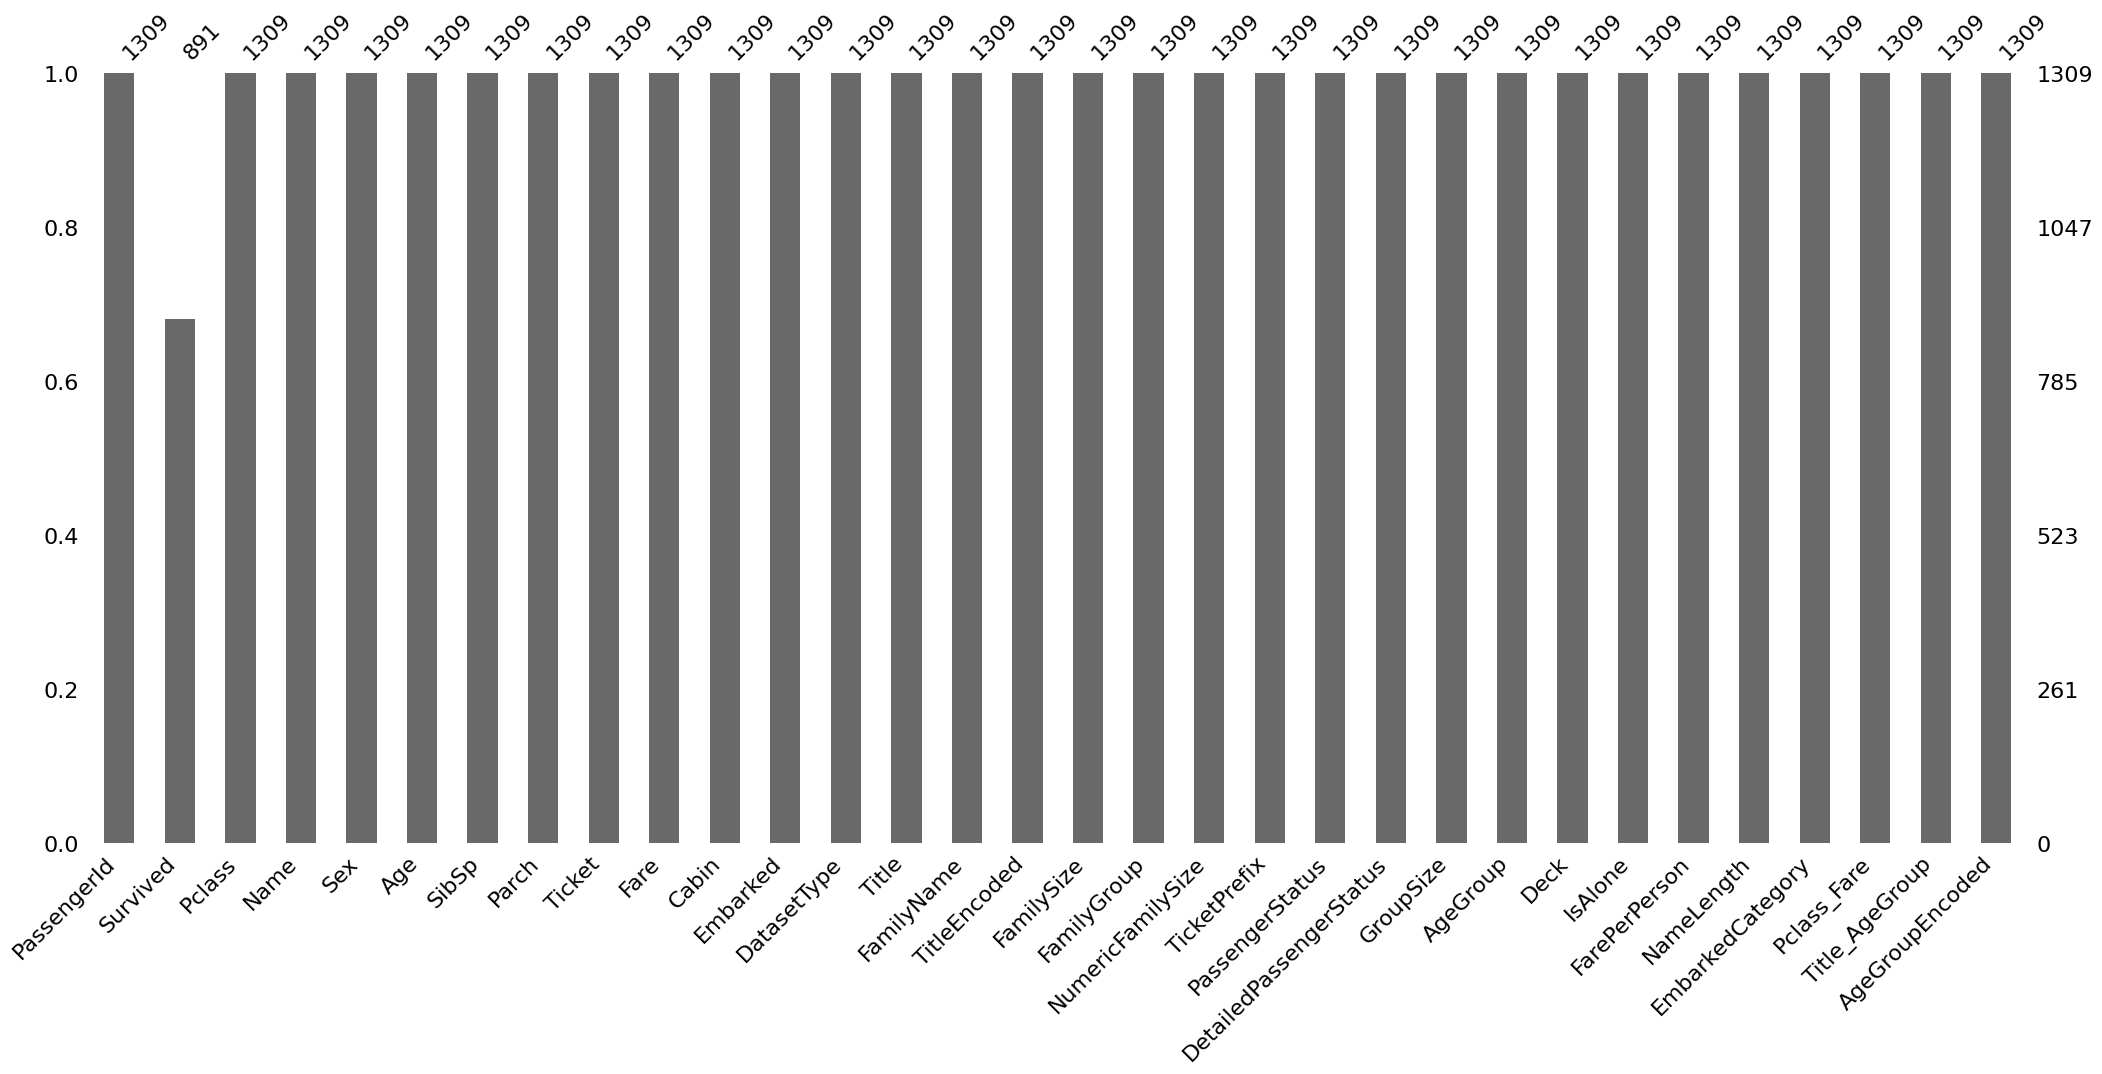

In [72]:
import missingno as msno
plt.figure(figsize=(10, 6))
msno.bar(combined_data)
plt.show()


EDA##

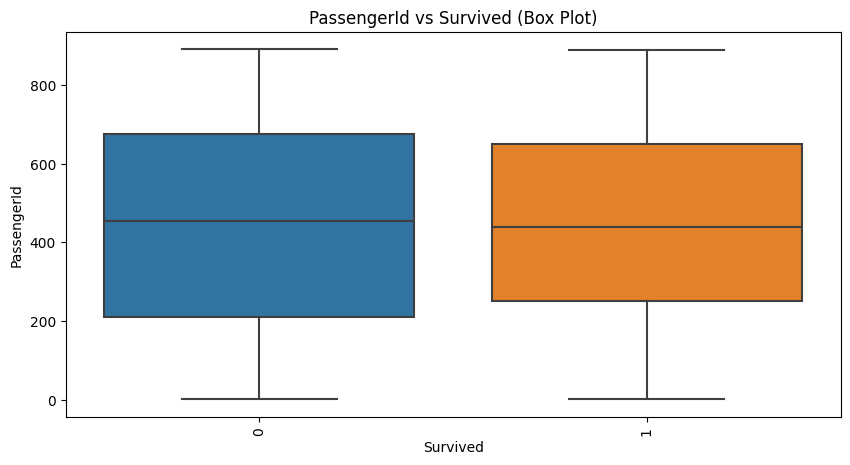

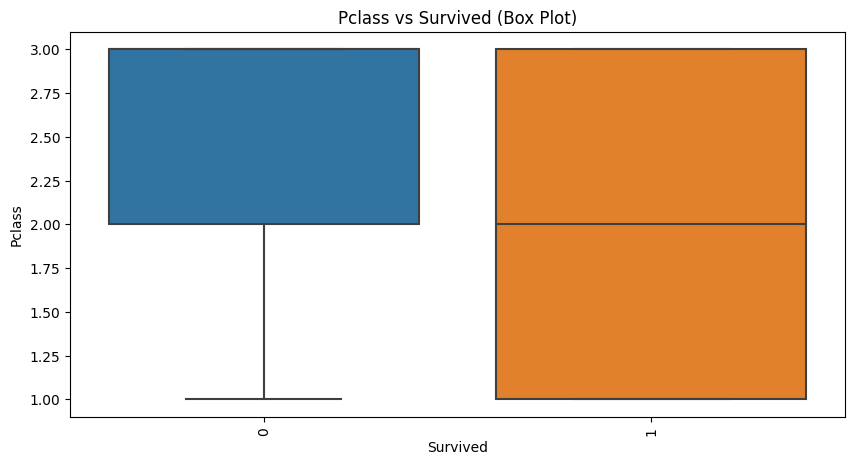

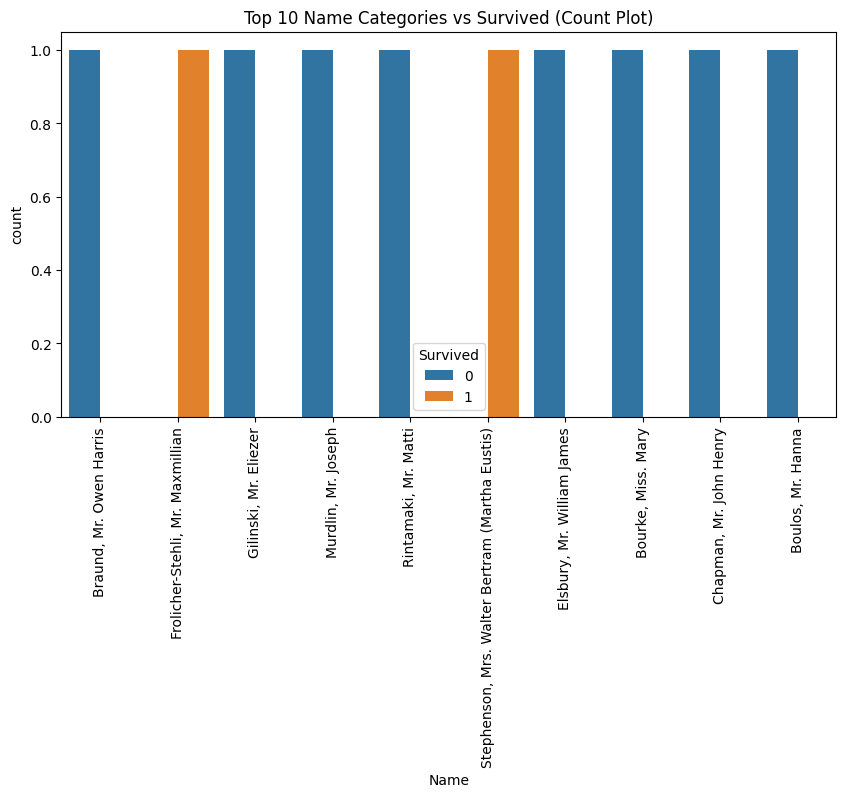

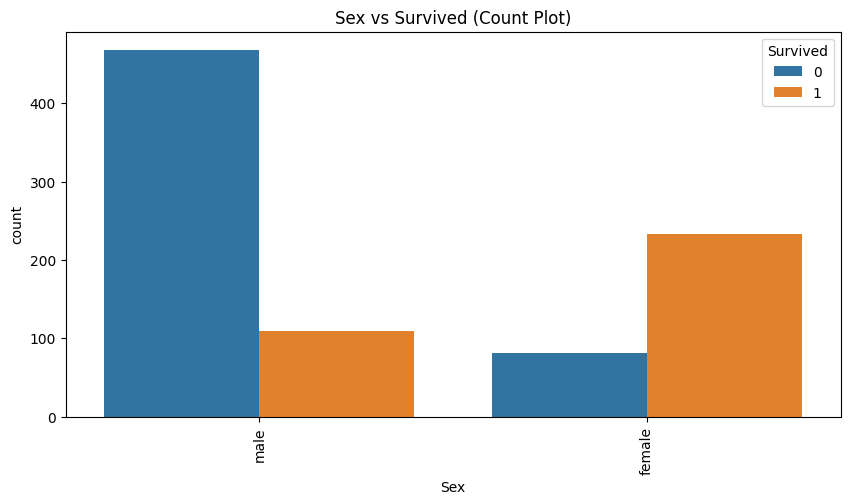

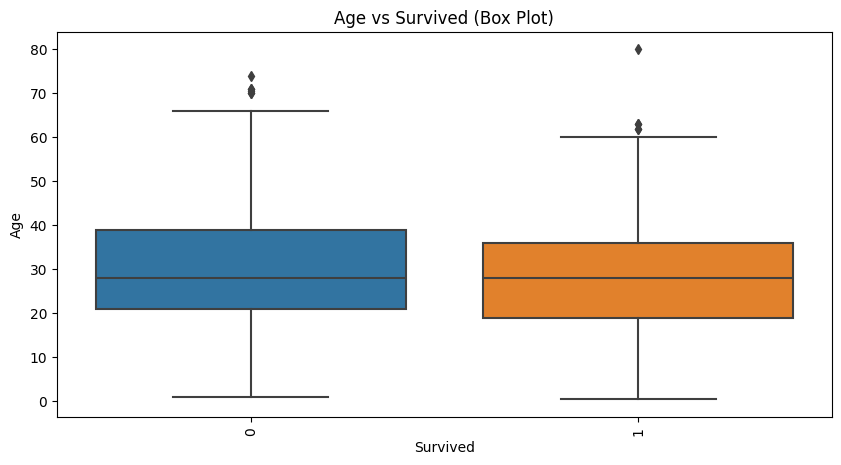

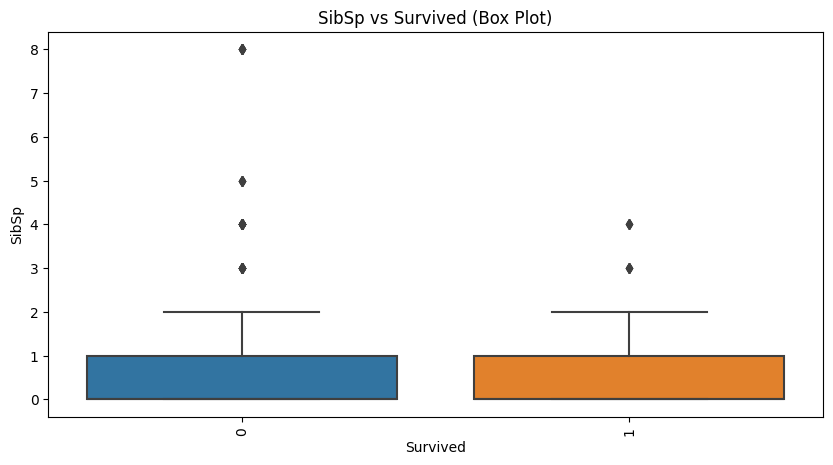

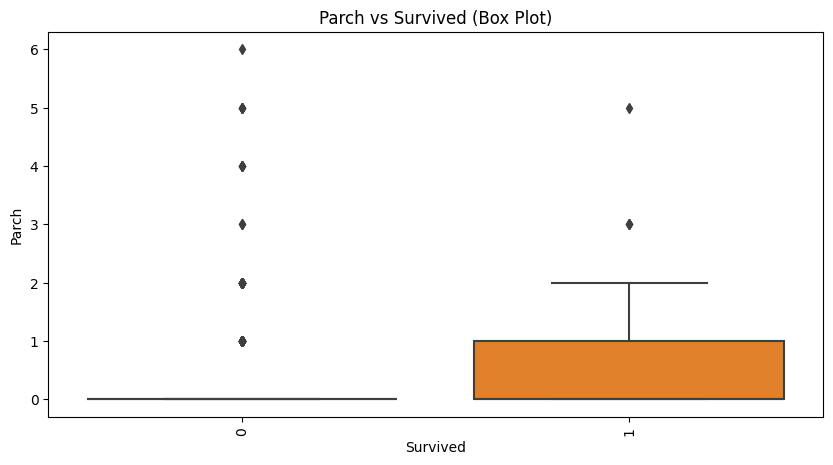

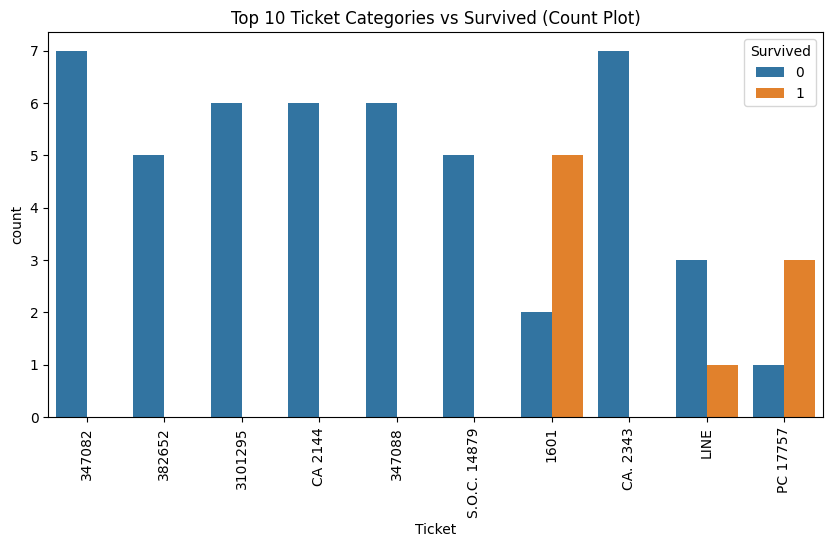

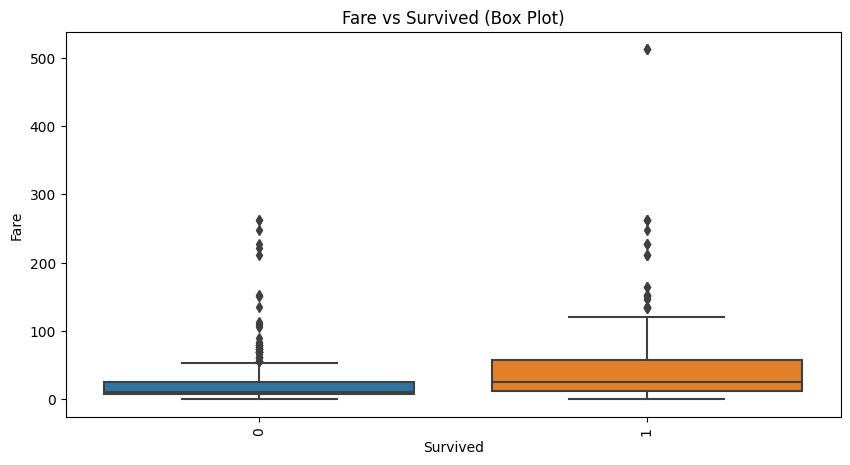

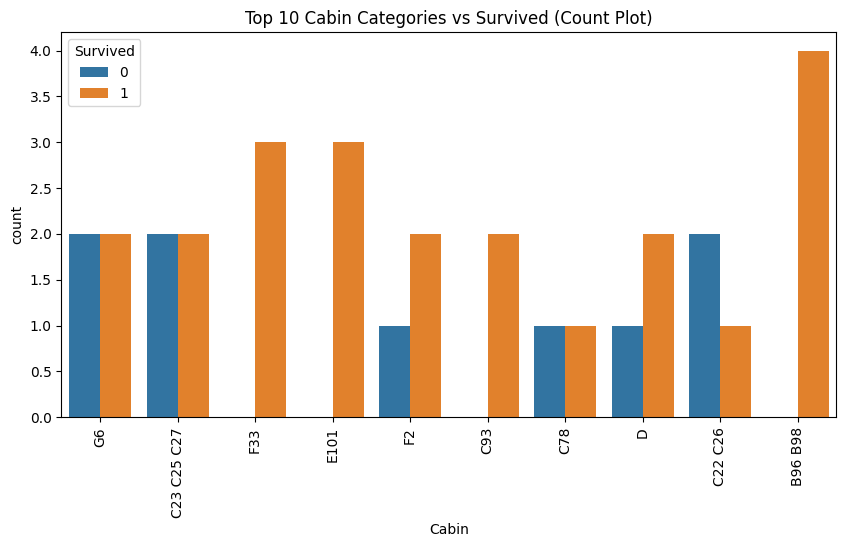

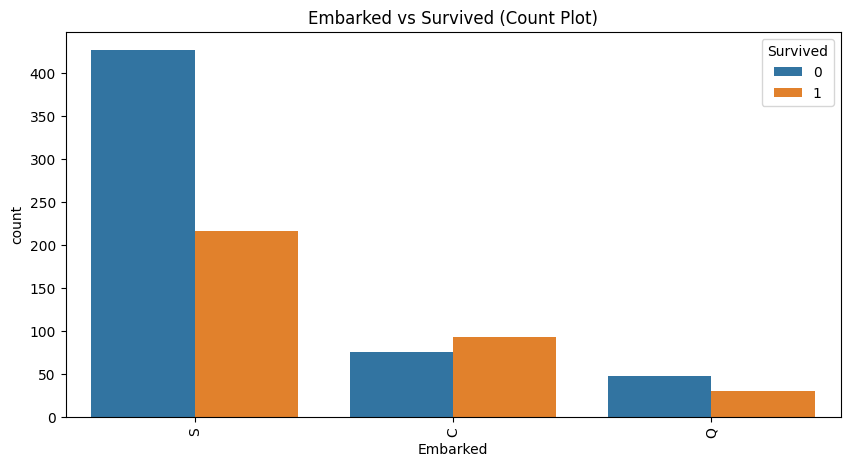

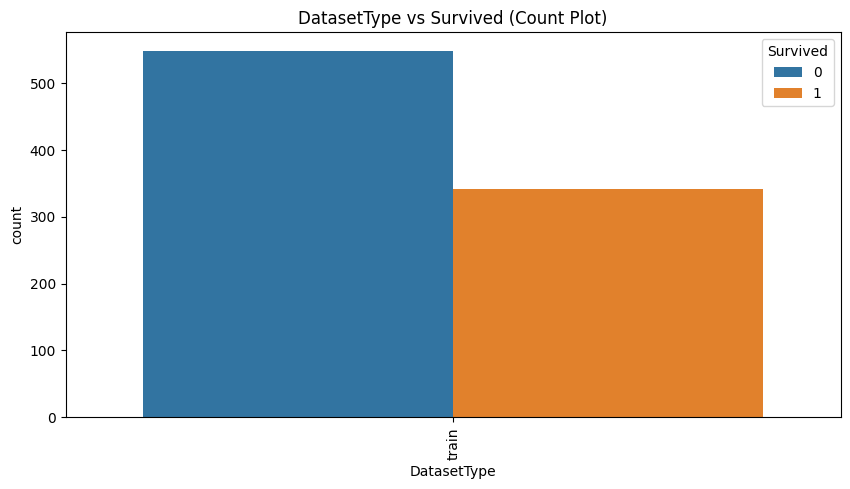

In [73]:
def univariate_analysis(df, target):
    # Separate numerical and categorical features
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    for col in df.columns:
        if col == target:
            continue

        plt.figure(figsize=(10, 5))
        if col in num_cols:
            # Numerical feature
            sns.boxplot(x=target, y=col, data=df)
            plt.title(f'{col} vs {target} (Box Plot)')
        elif col in cat_cols:
            # Categorical feature
            if df[col].nunique() > 10:
                # Show only top 10 categories by frequency
                top_10_categories = df[col].value_counts().head(10).index
                temp_df = df[df[col].isin(top_10_categories)]
                sns.countplot(x=col, hue=target, data=temp_df)
                plt.title(f'Top 10 {col} Categories vs {target} (Count Plot)')
            else:
                sns.countplot(x=col, hue=target, data=df)
                plt.title(f'{col} vs {target} (Count Plot)')
        plt.xticks(rotation=90)
        plt.show()


univariate_analysis(train_data, "Survived")


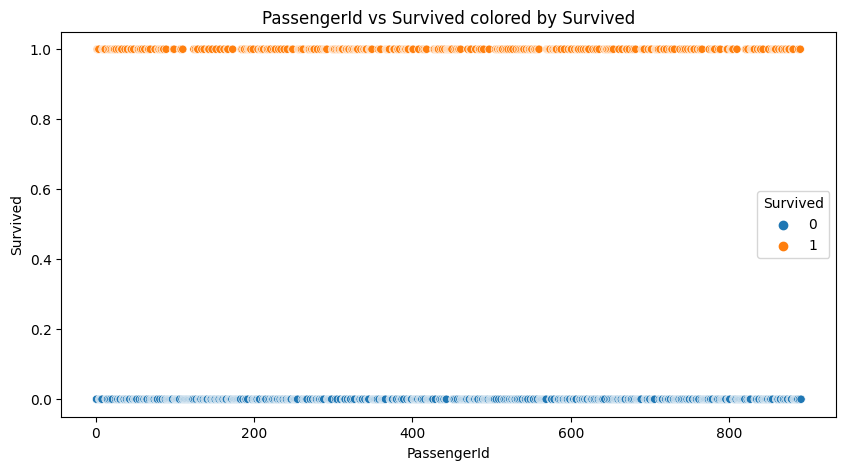

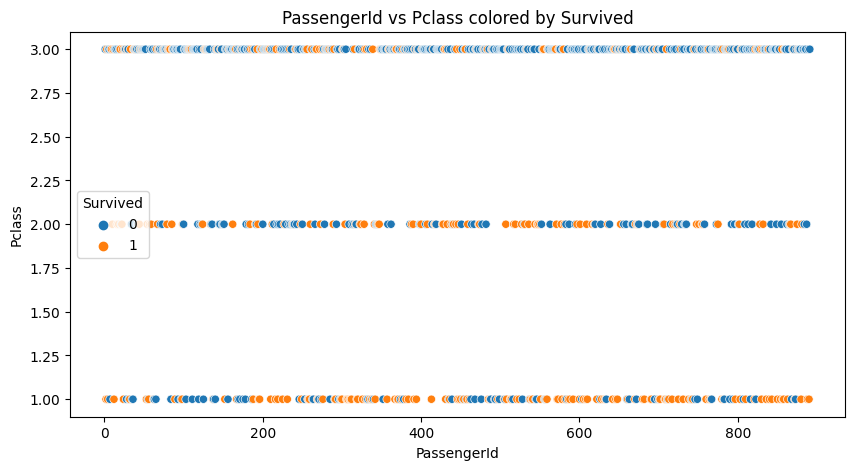

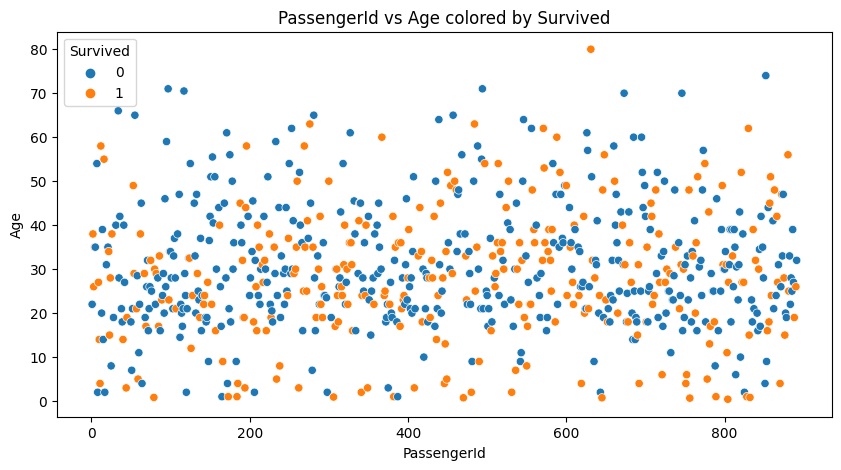

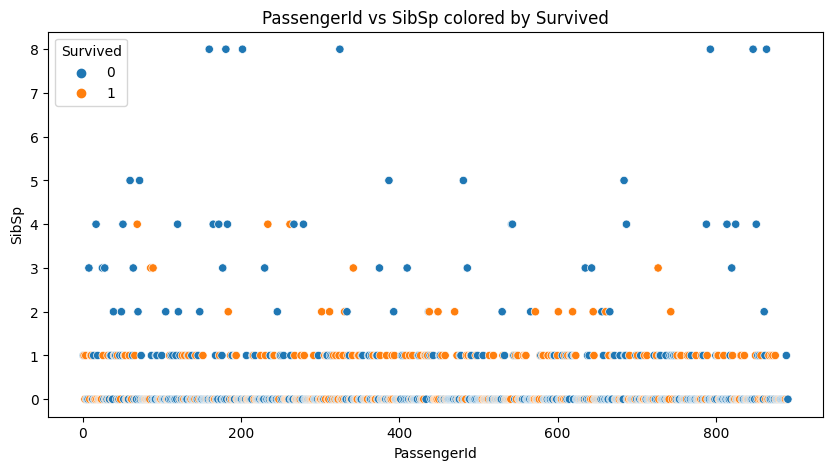

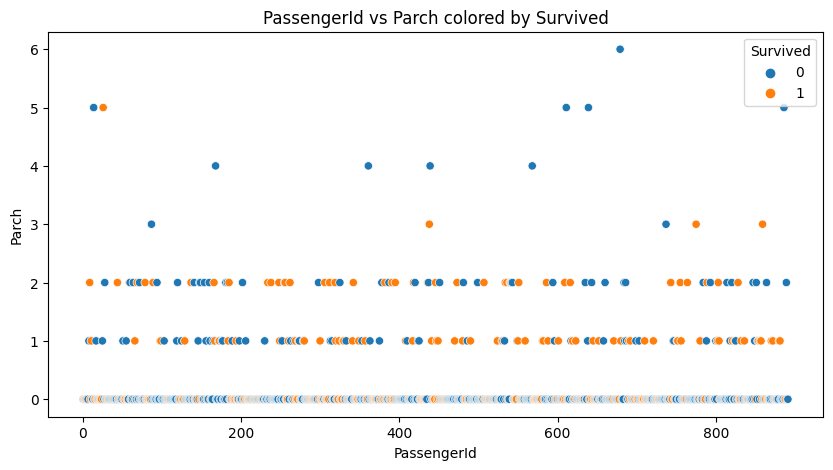

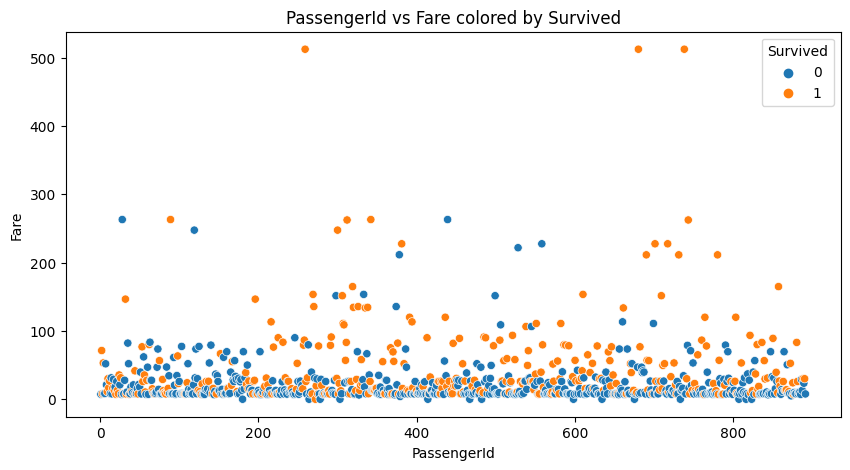

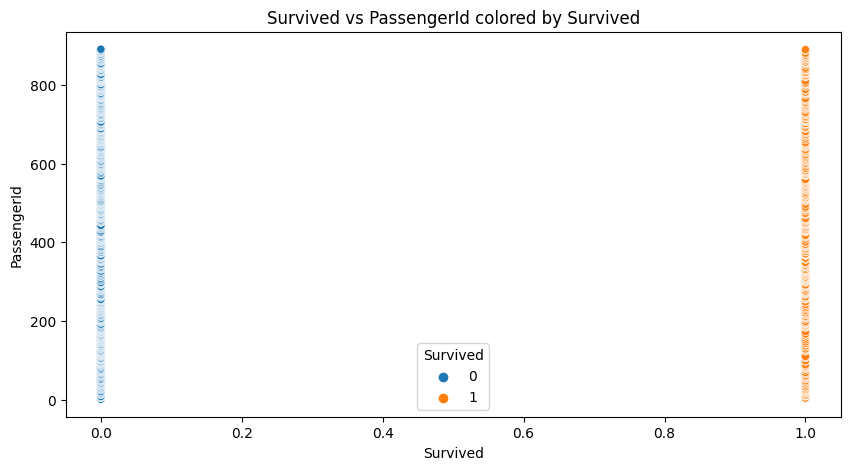

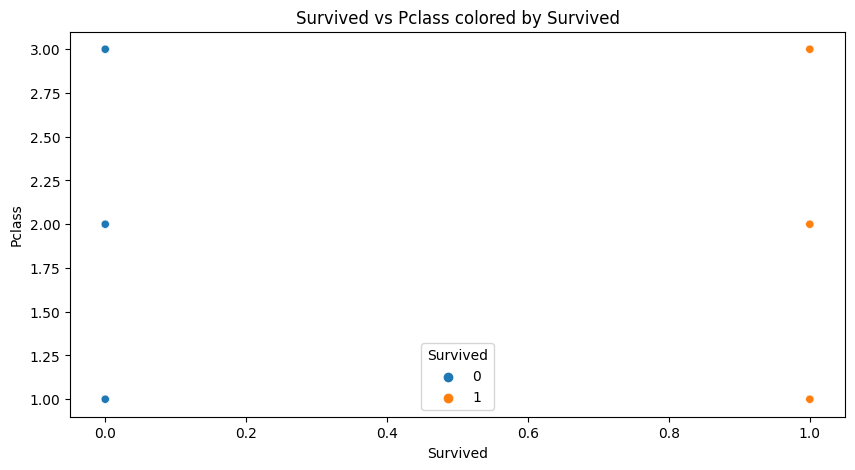

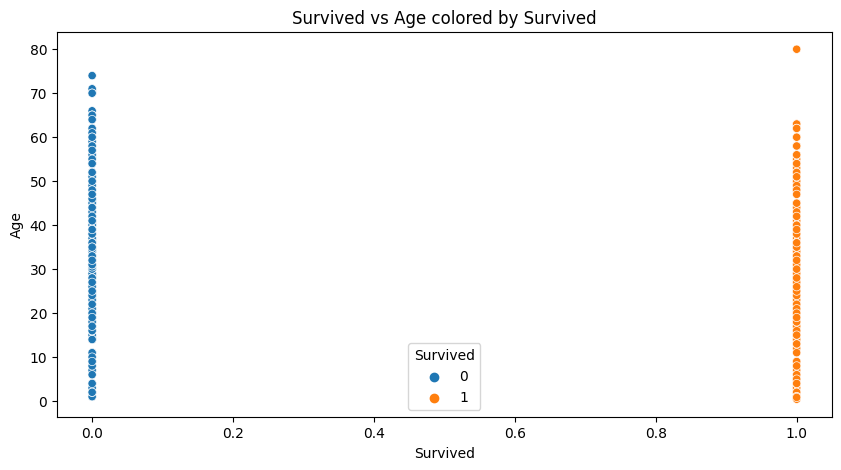

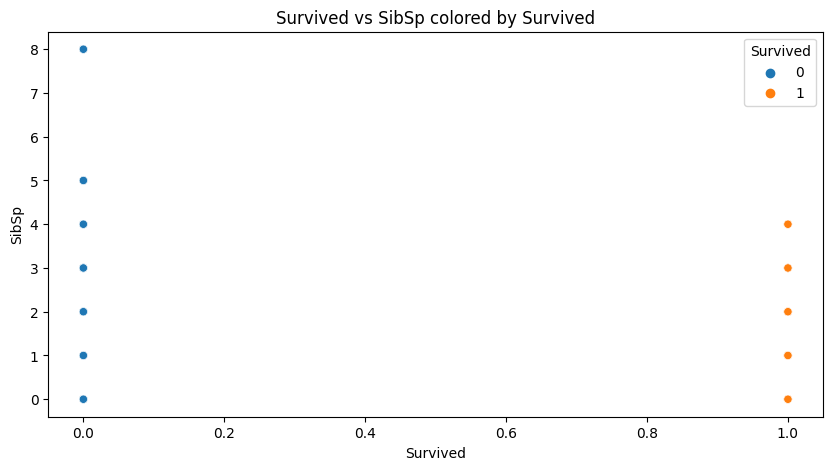

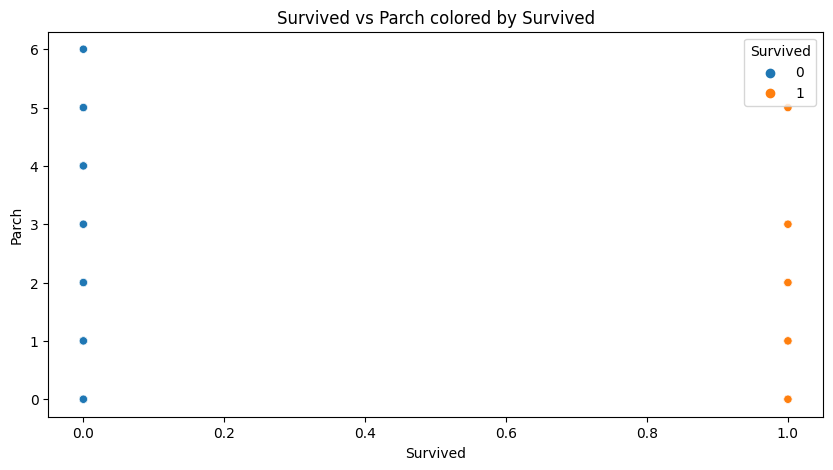

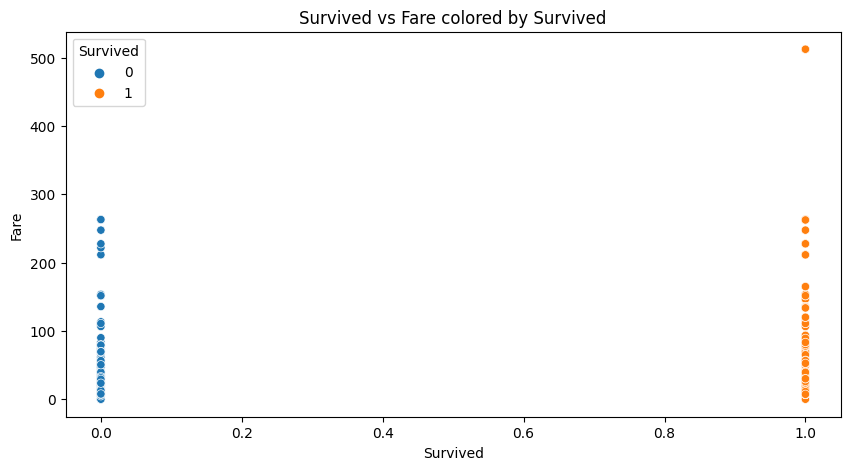

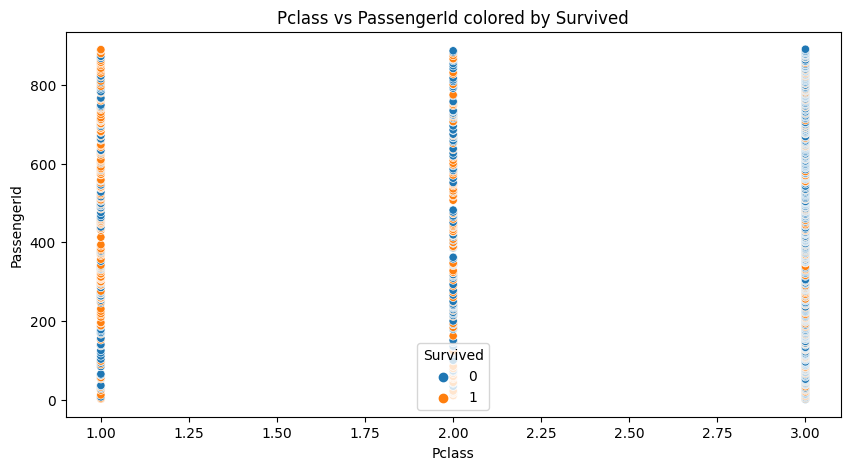

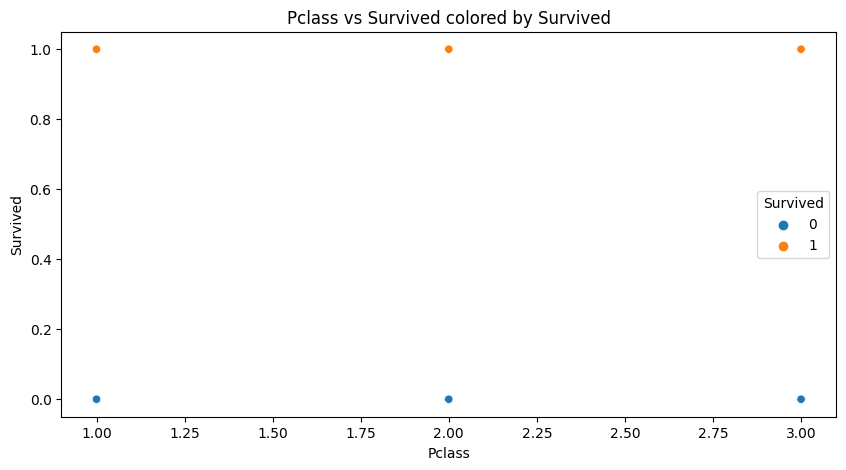

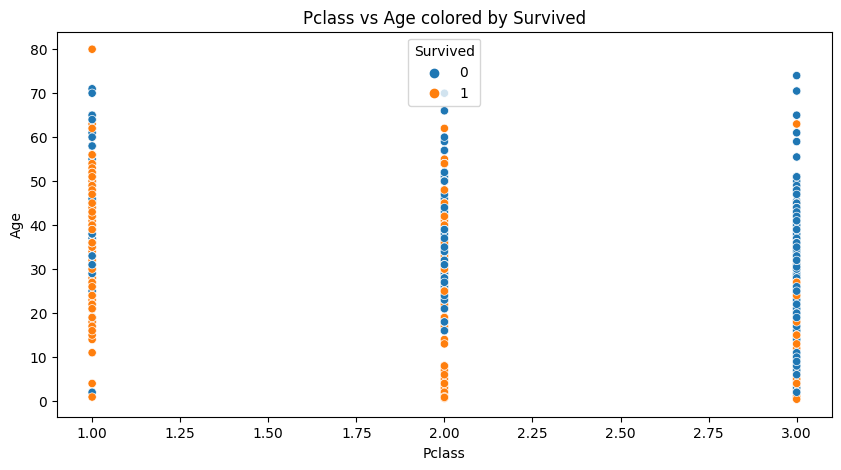

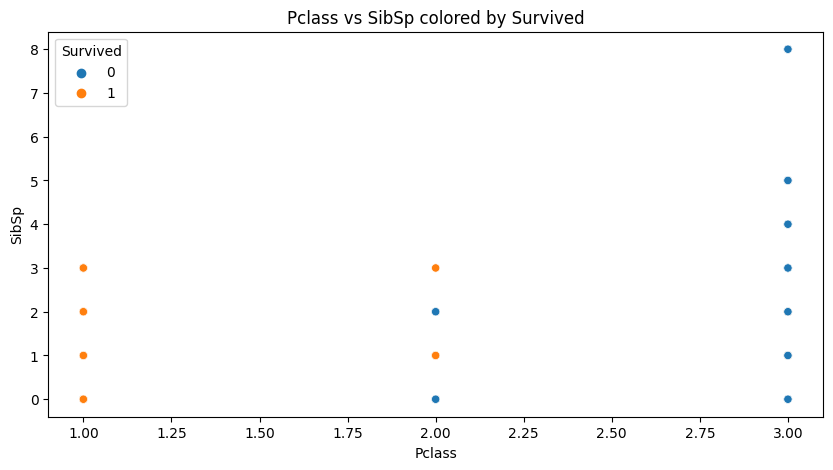

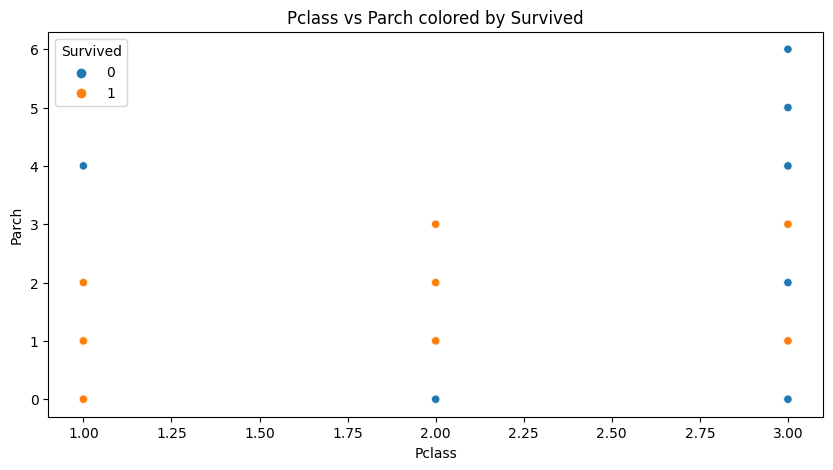

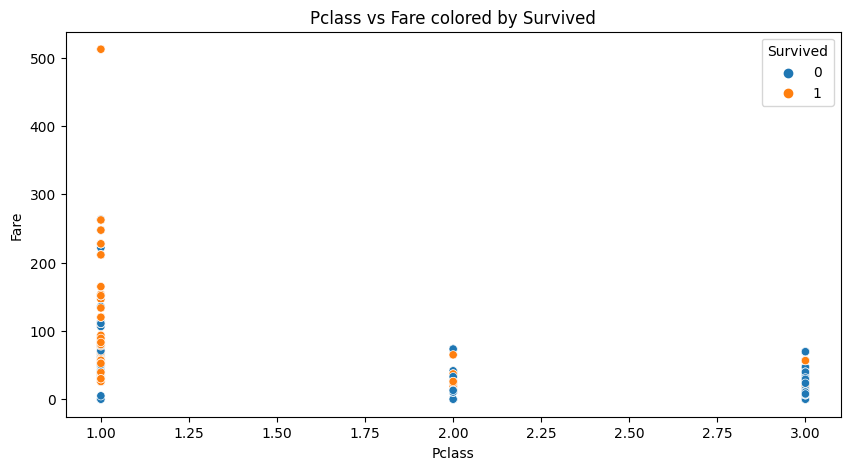

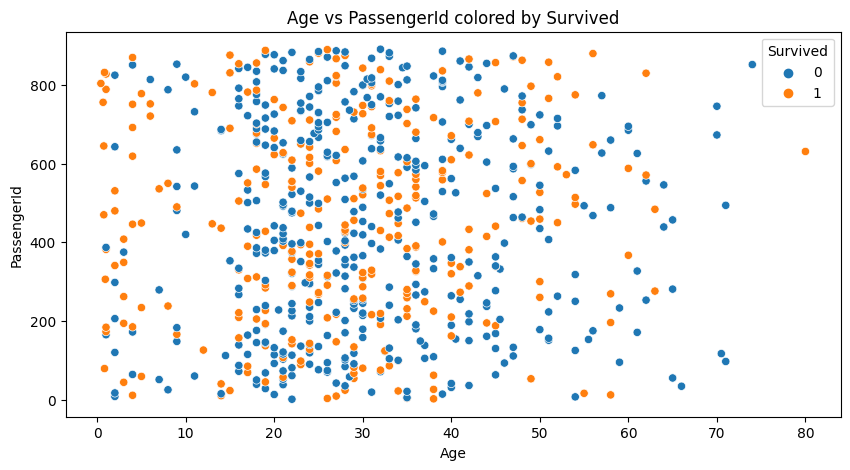

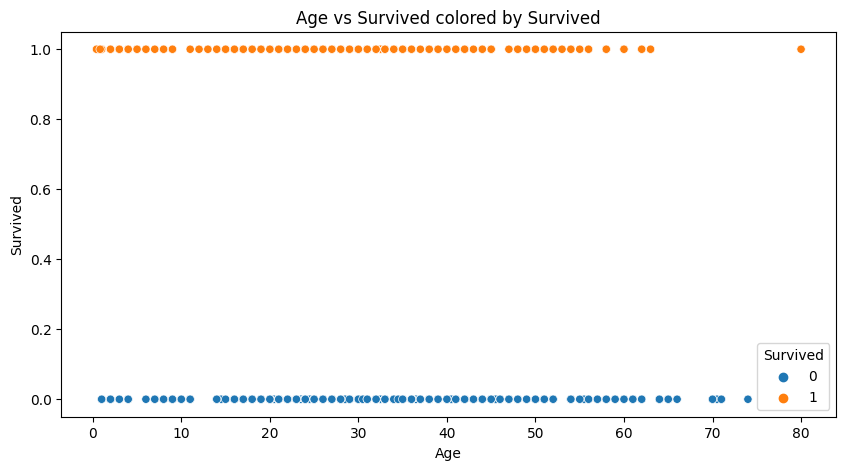

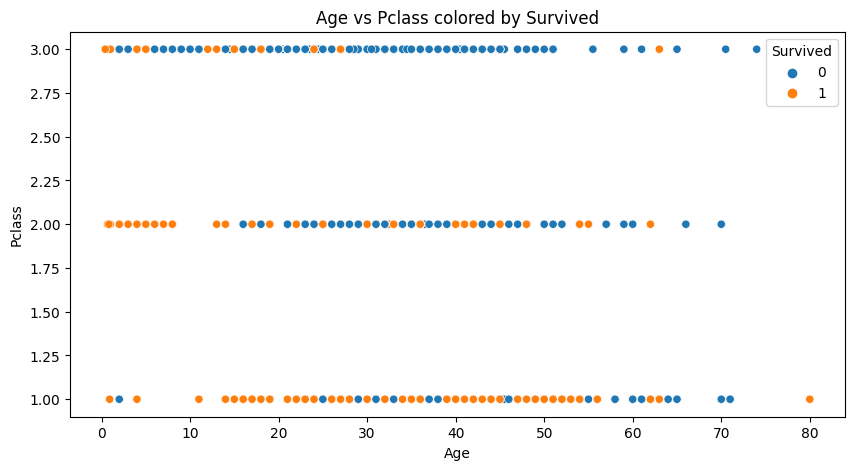

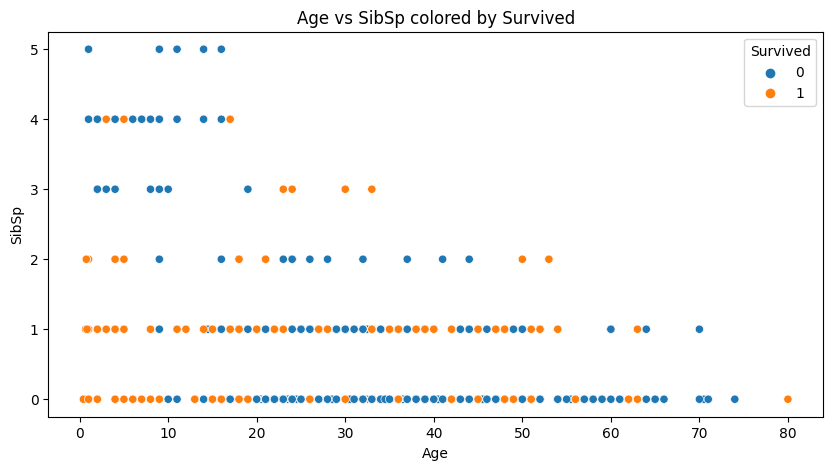

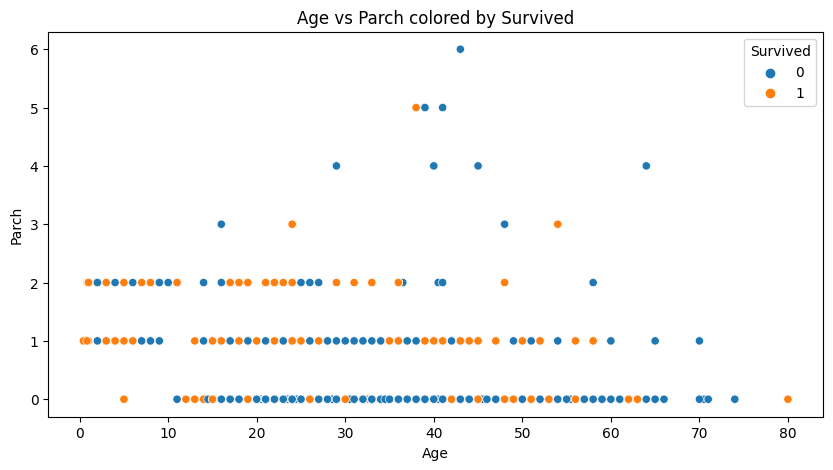

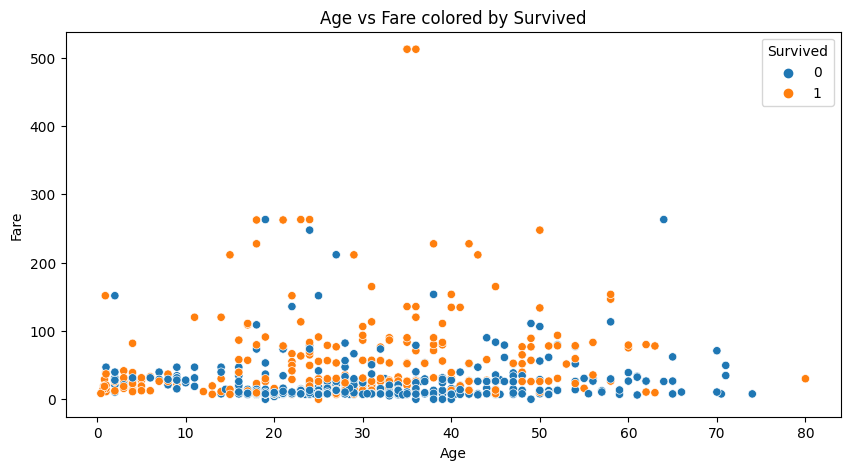

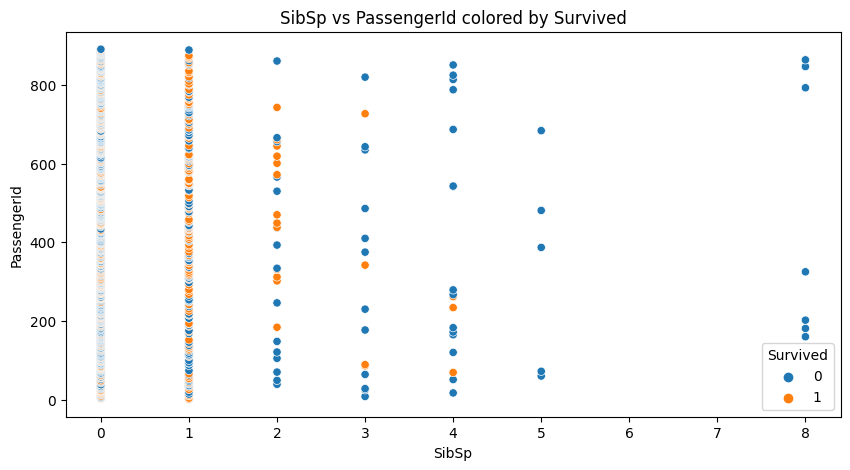

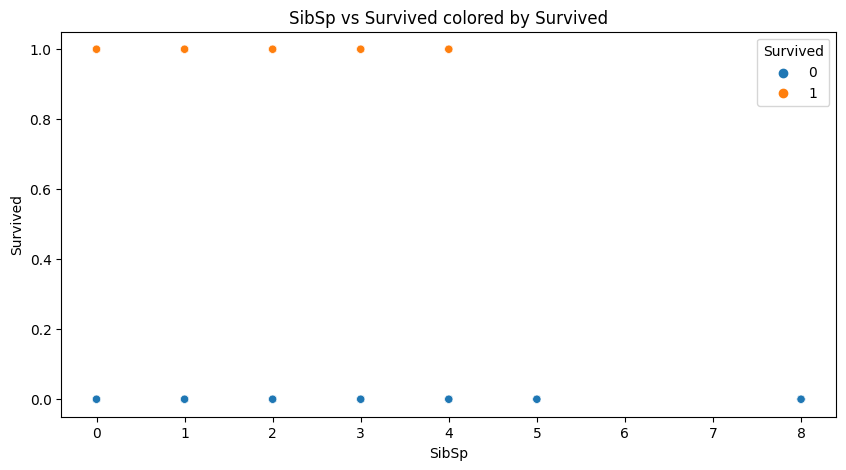

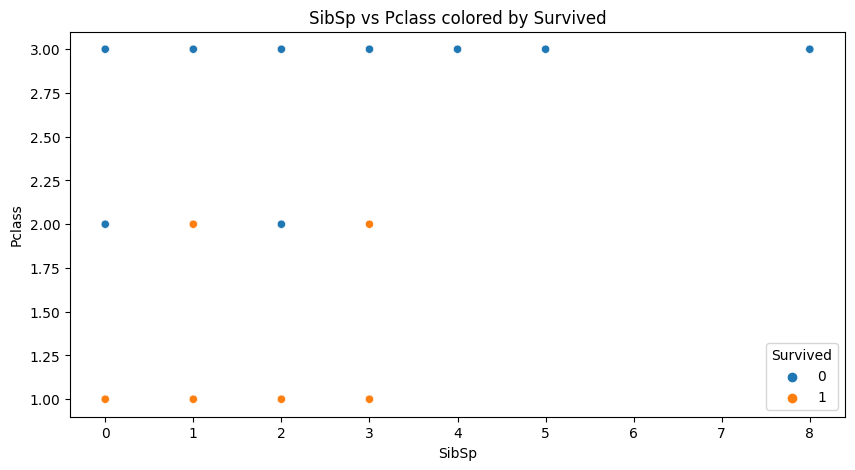

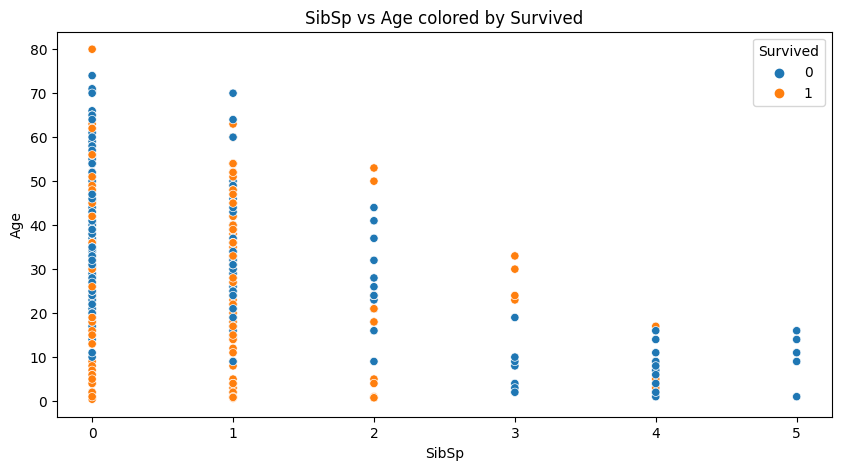

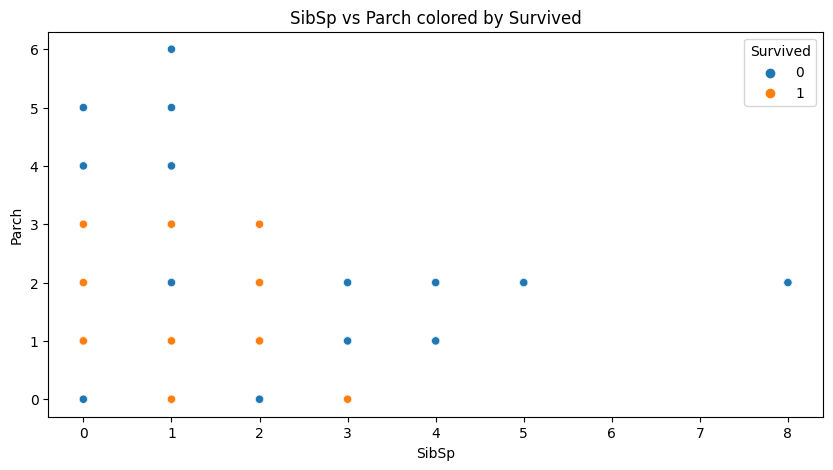

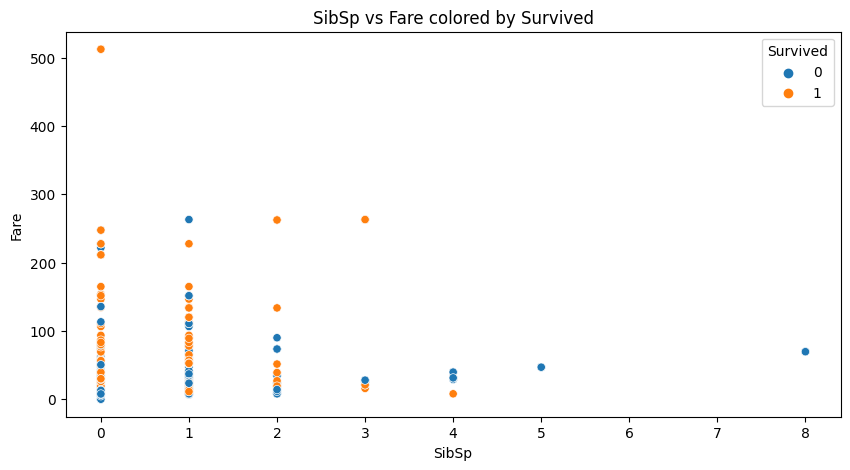

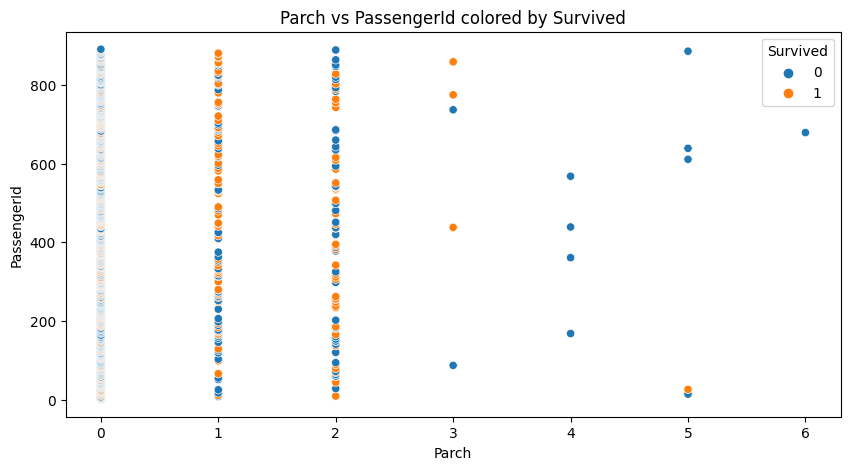

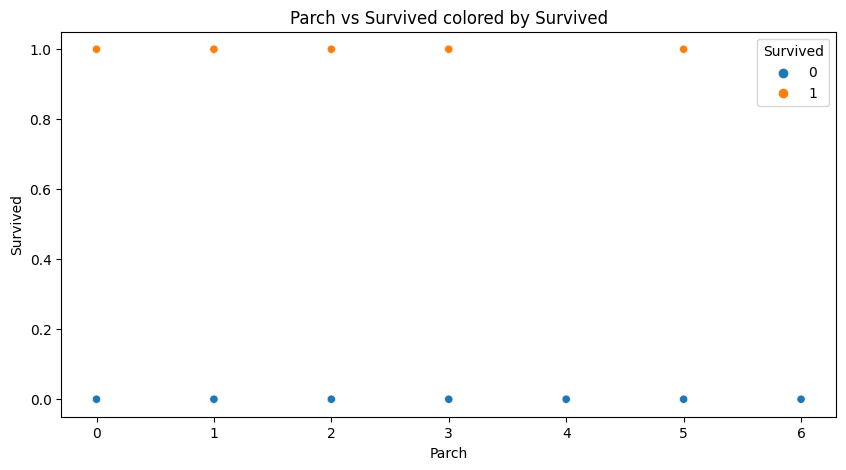

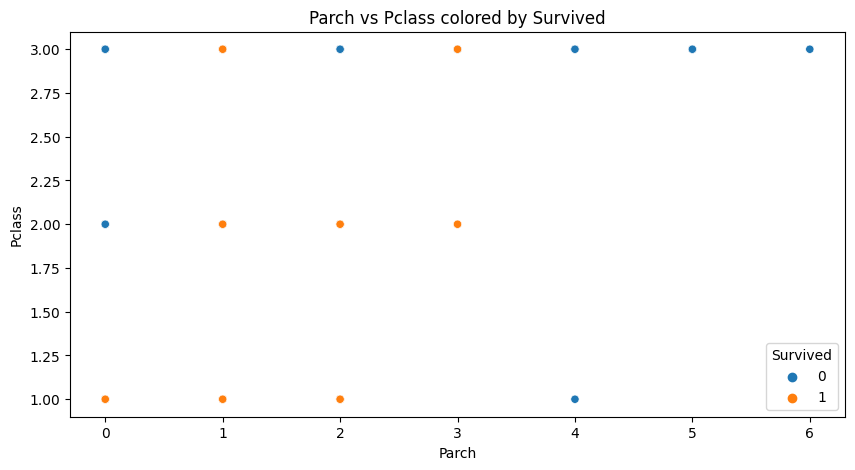

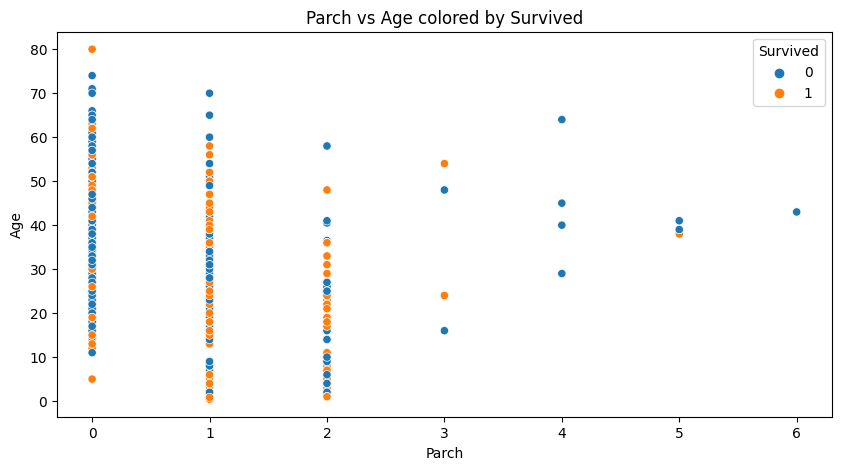

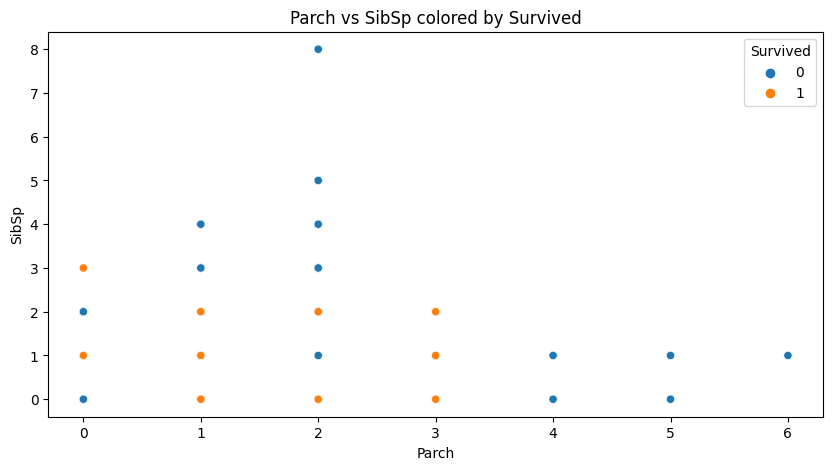

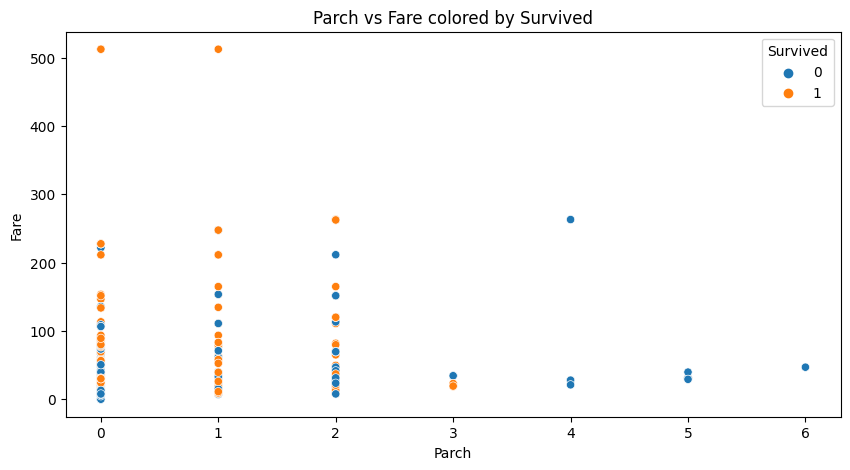

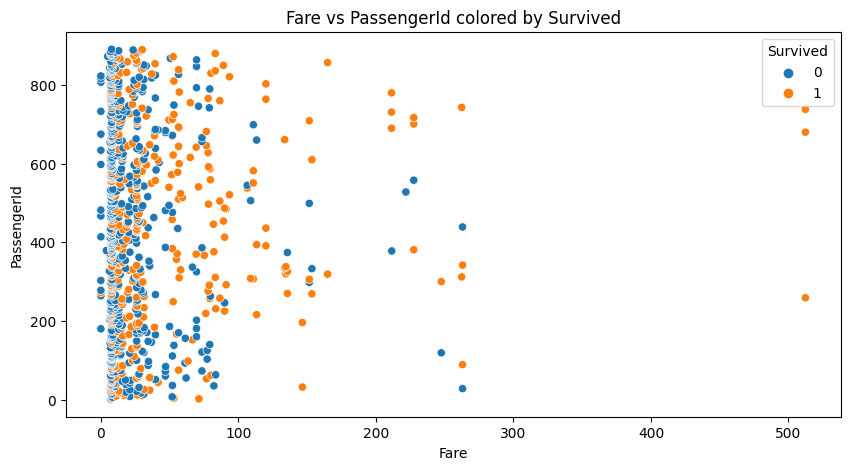

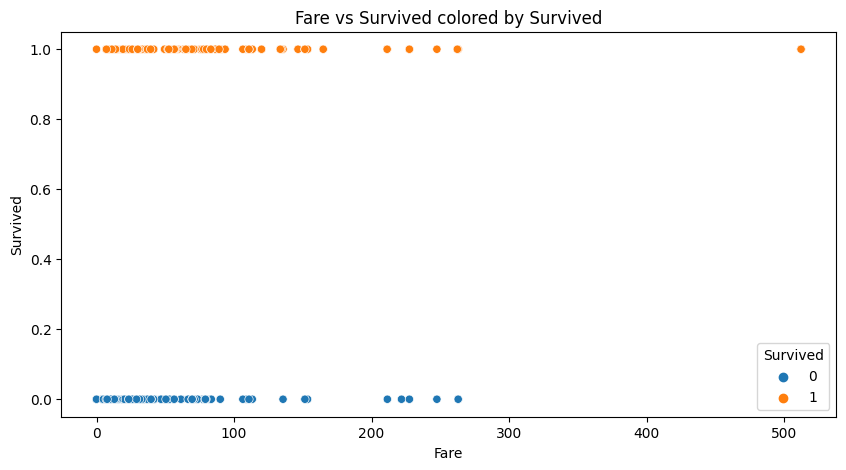

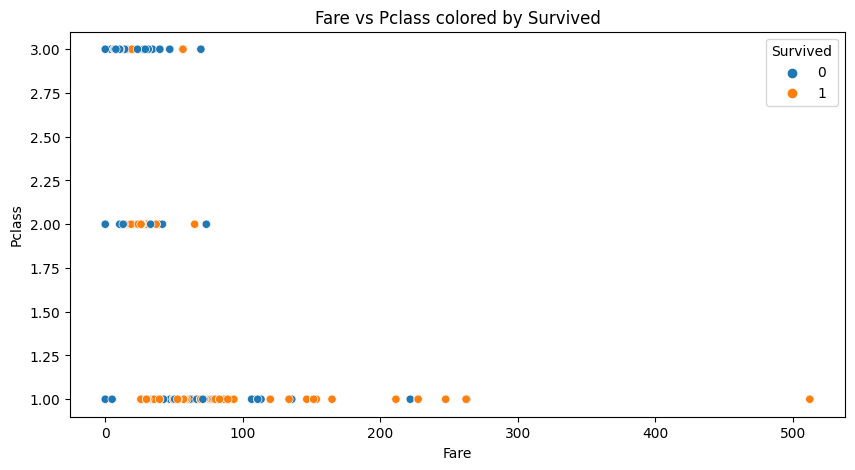

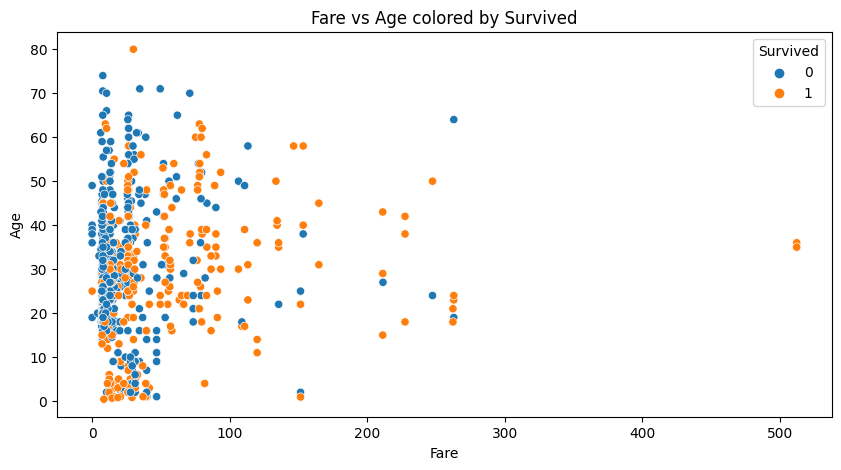

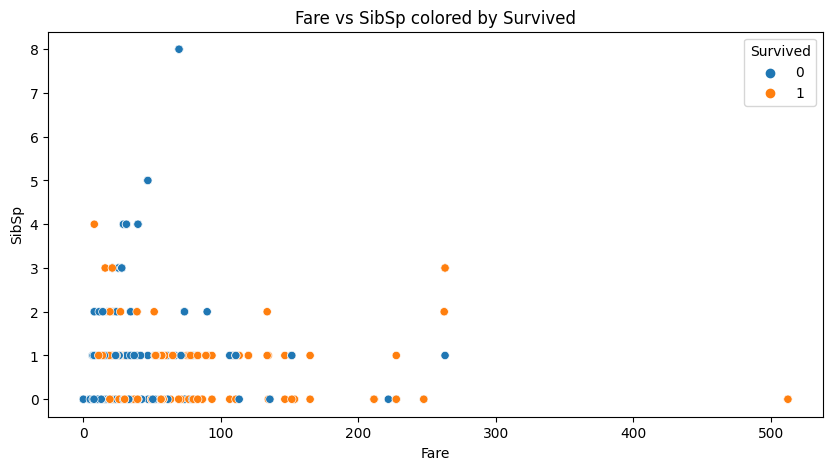

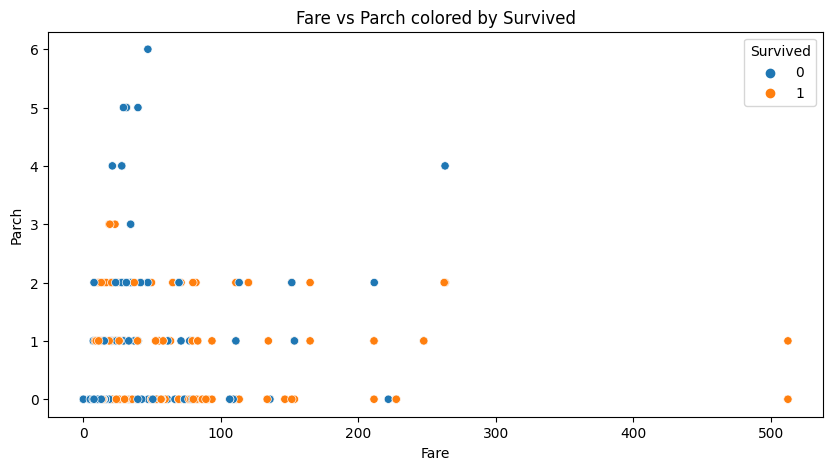

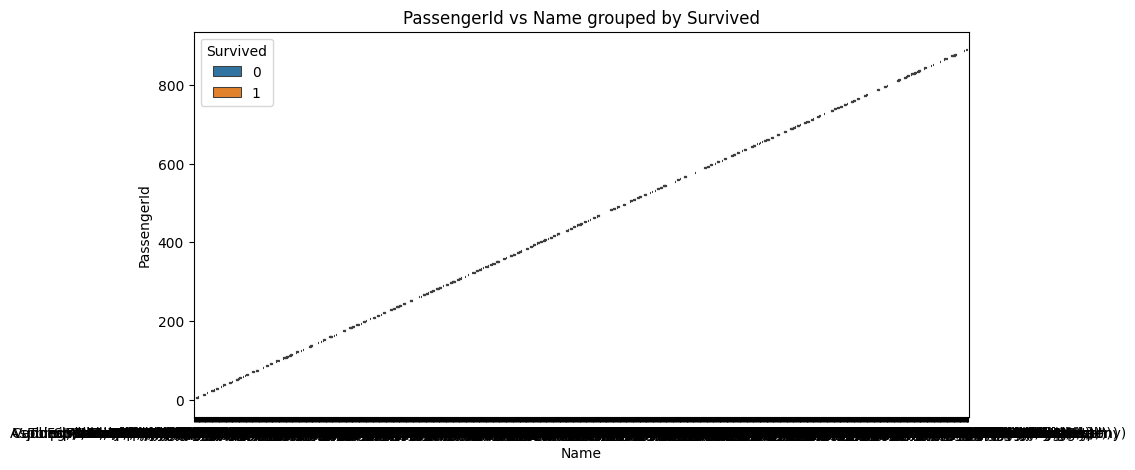

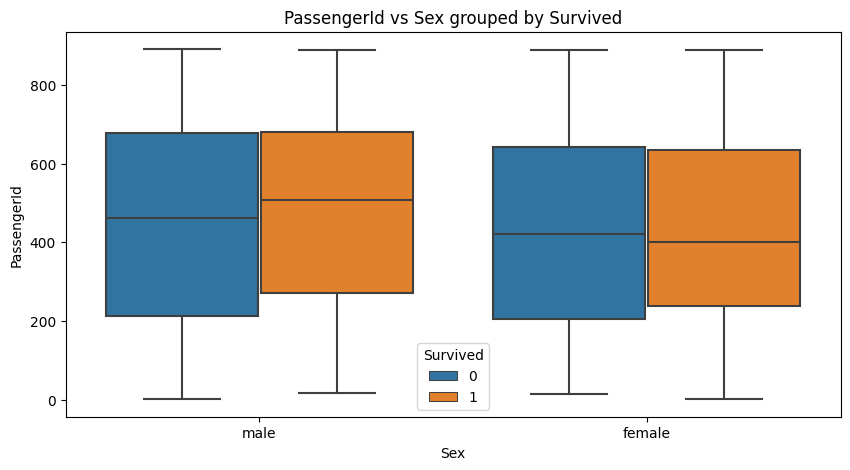

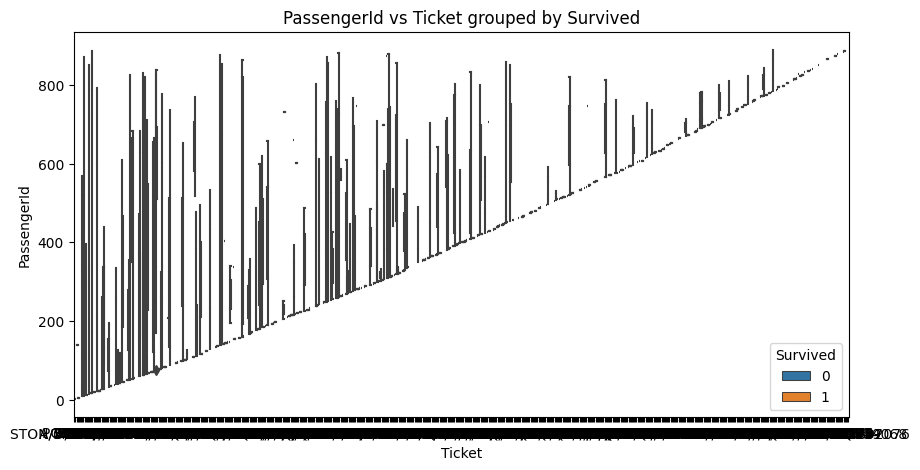

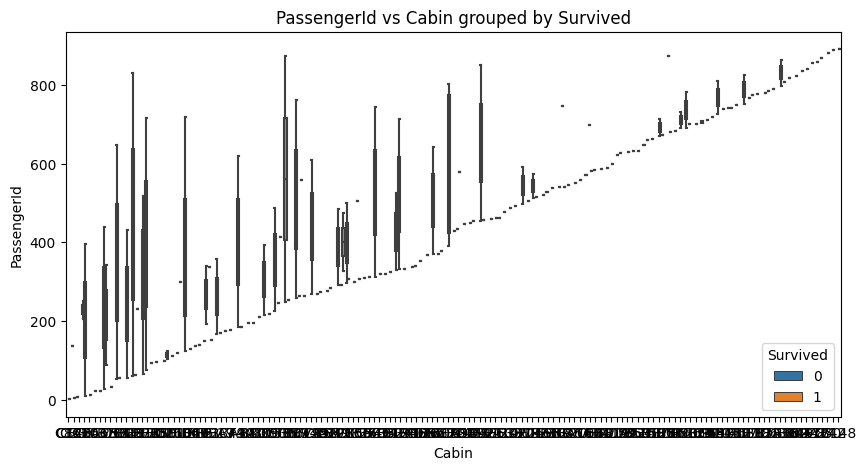

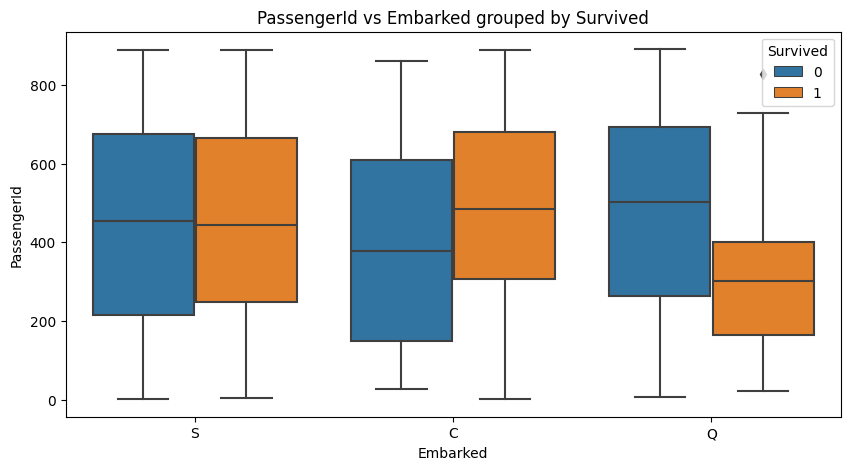

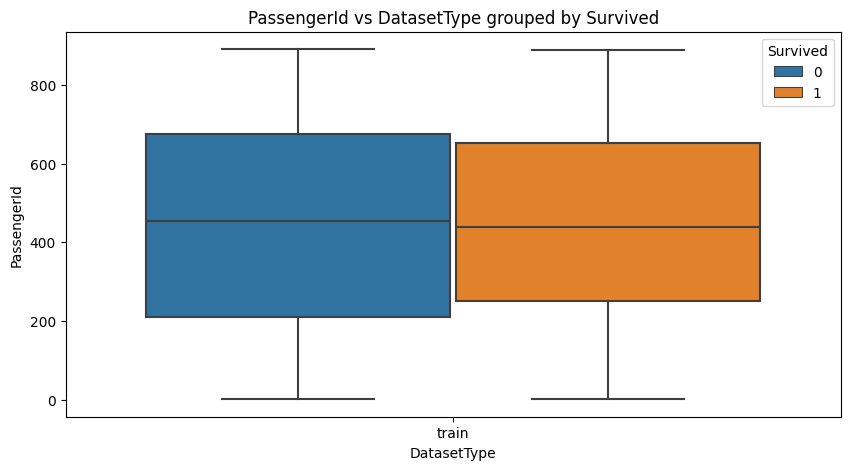

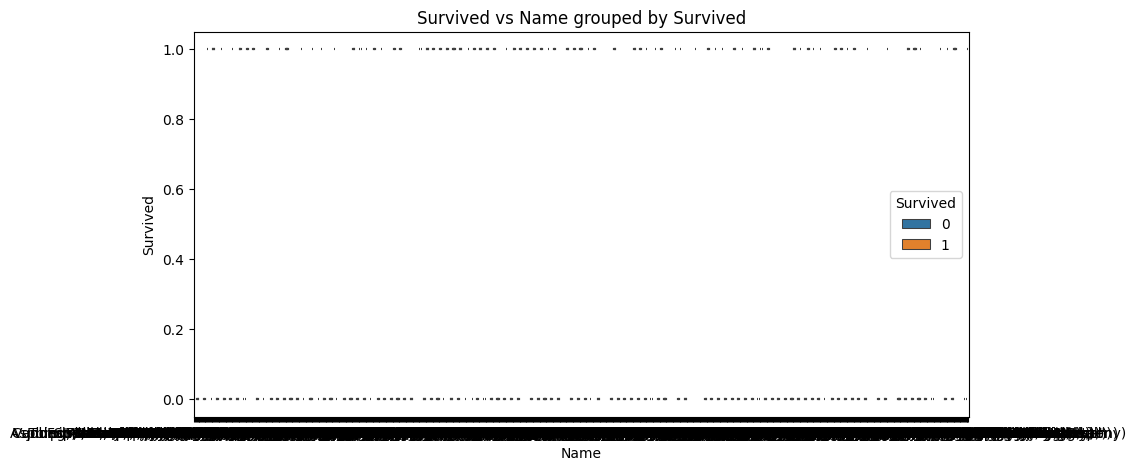

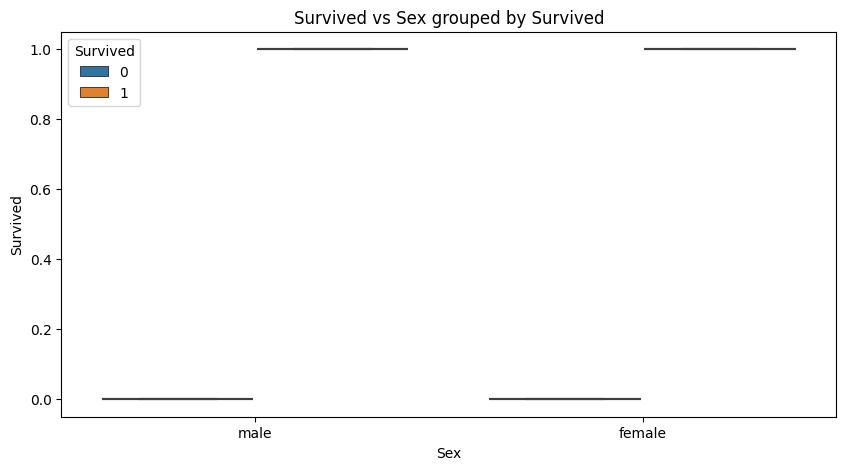

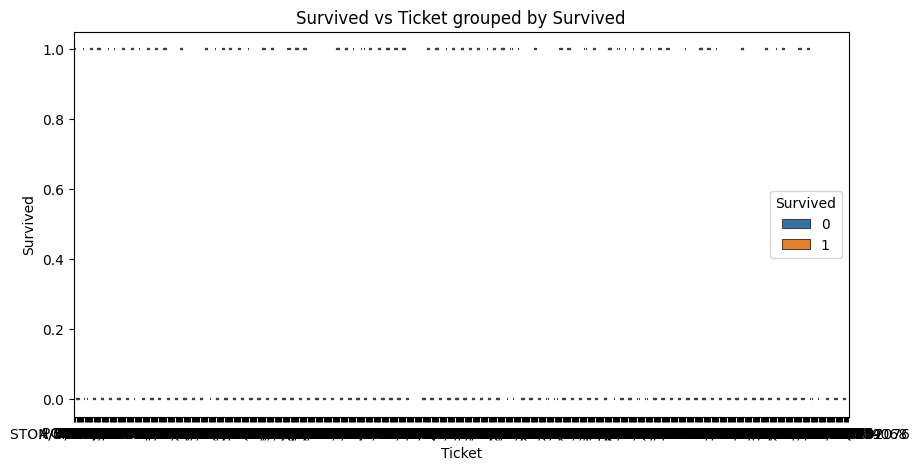

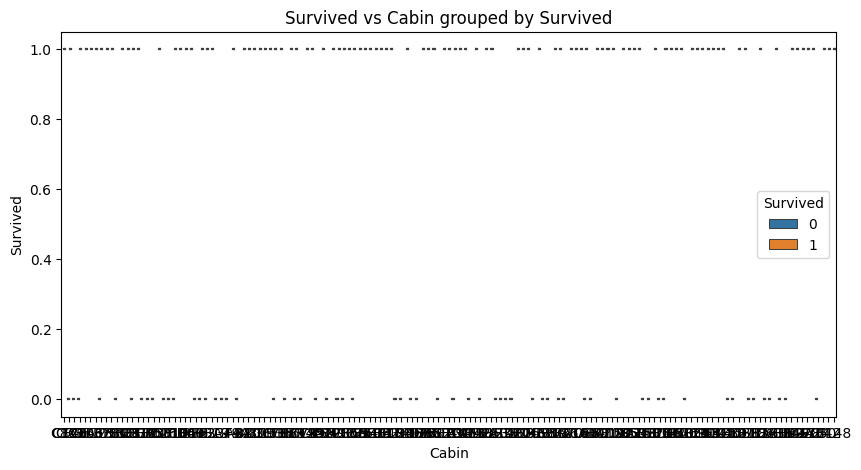

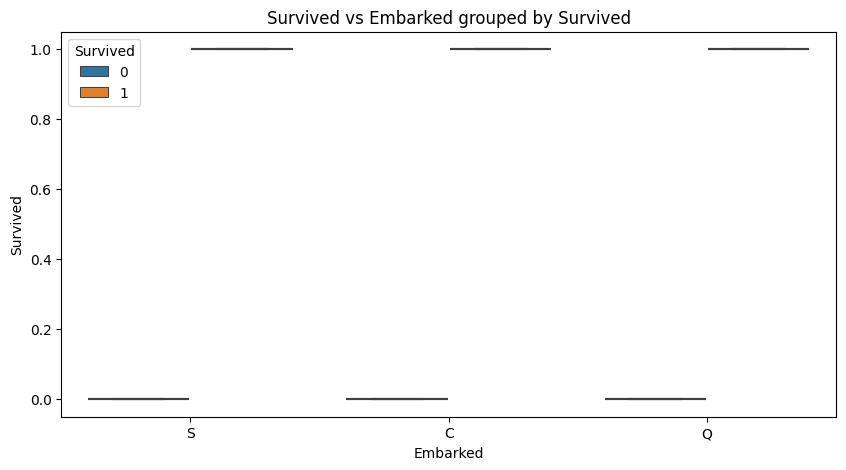

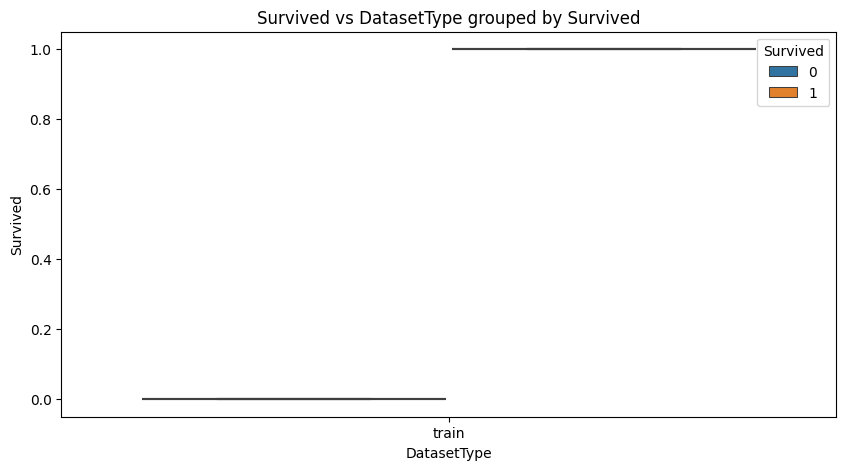

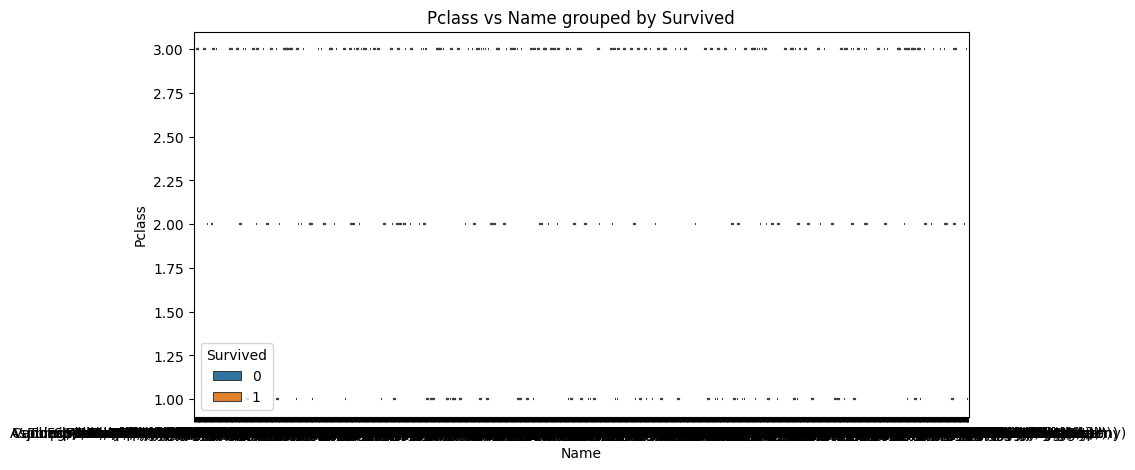

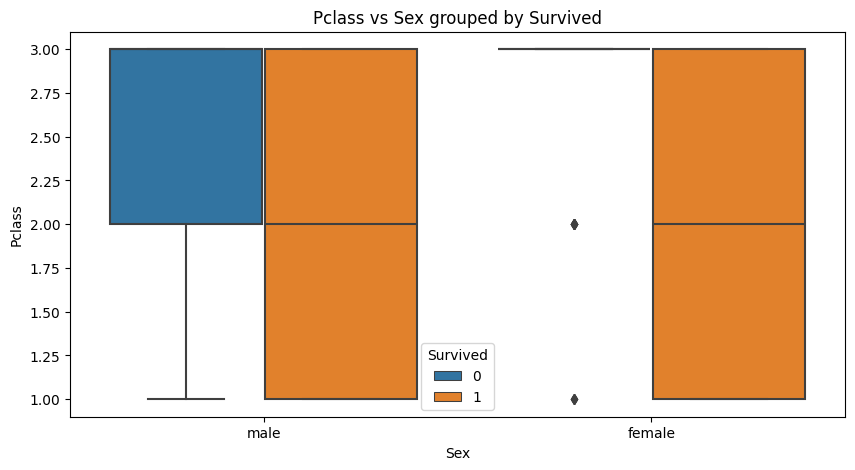

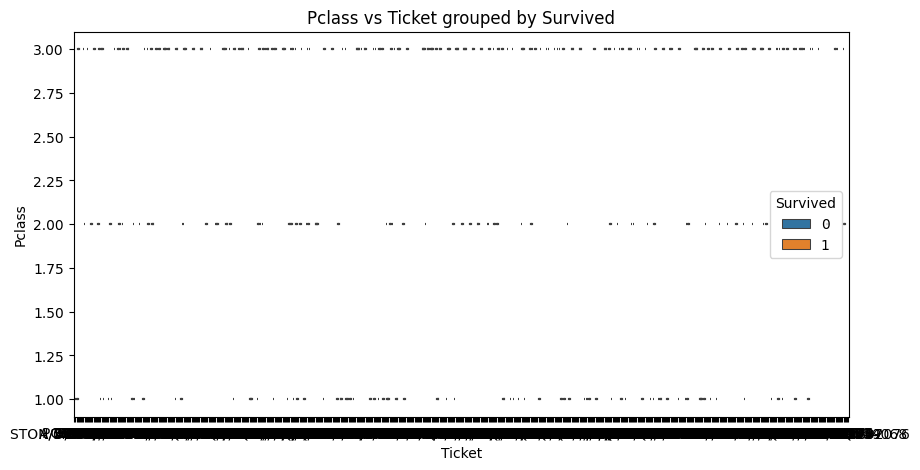

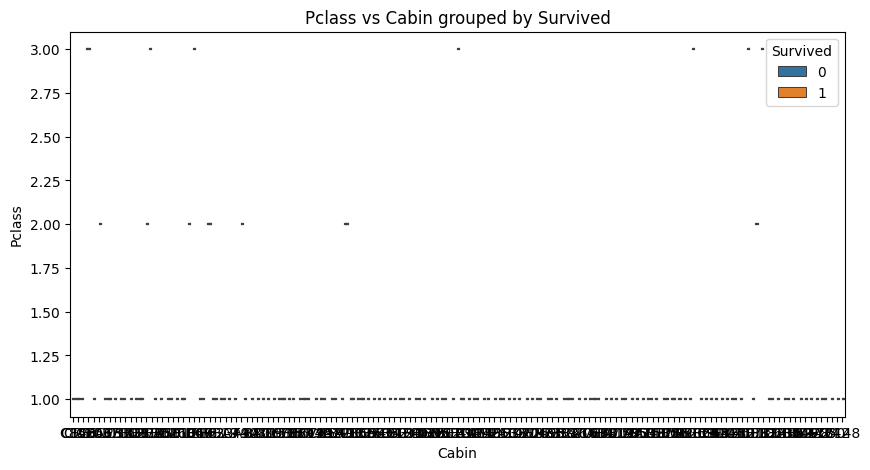

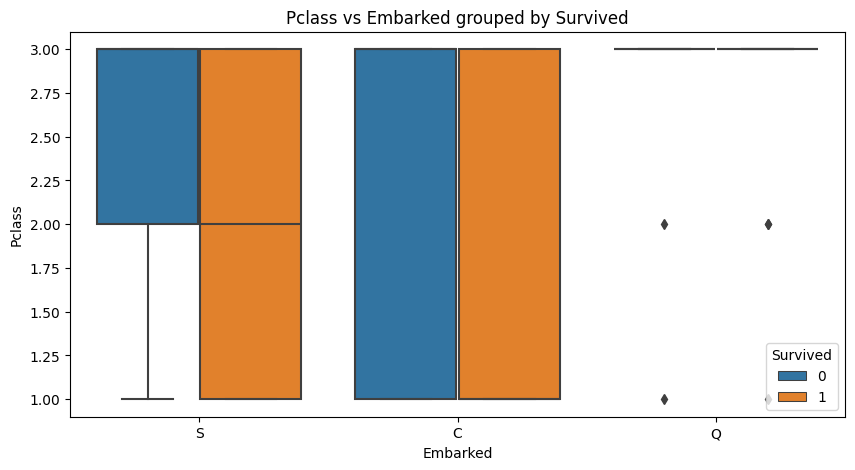

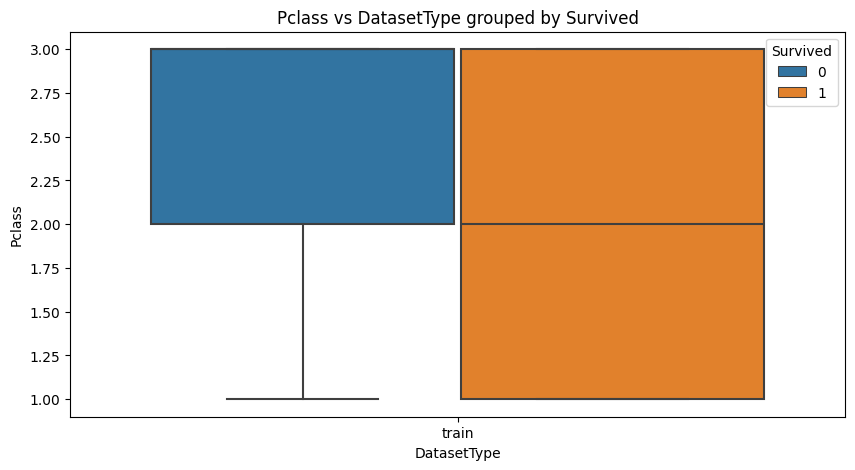

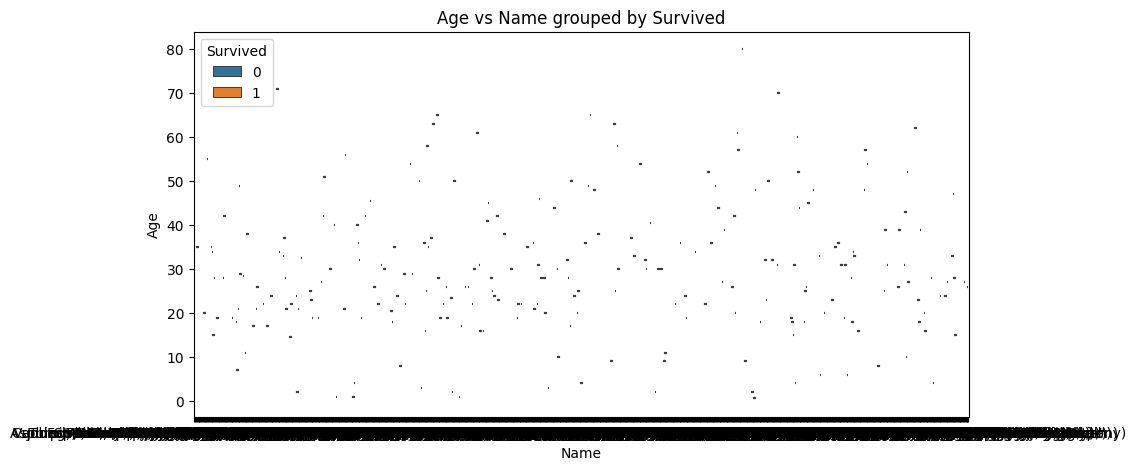

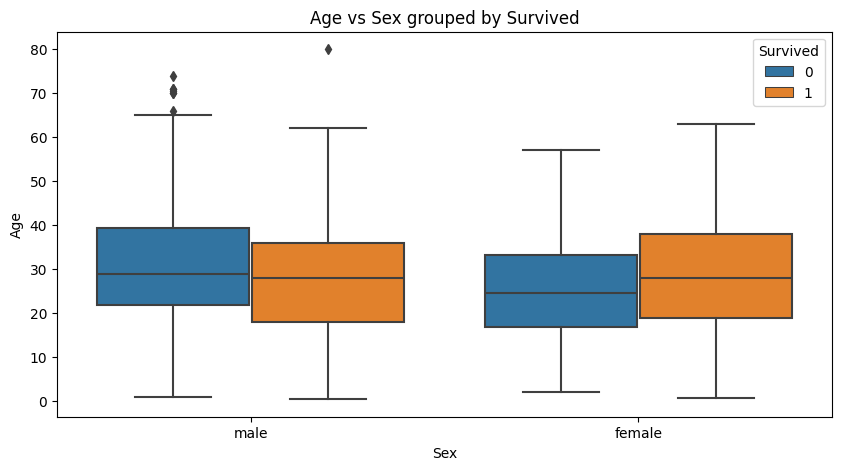

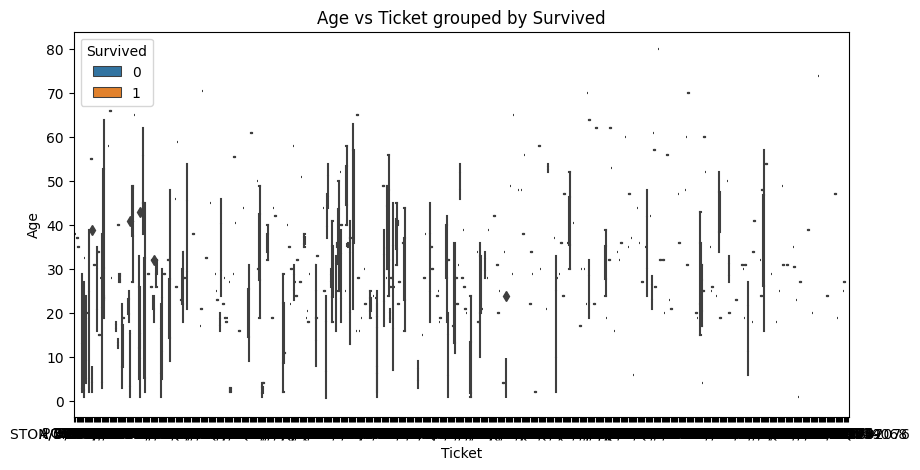

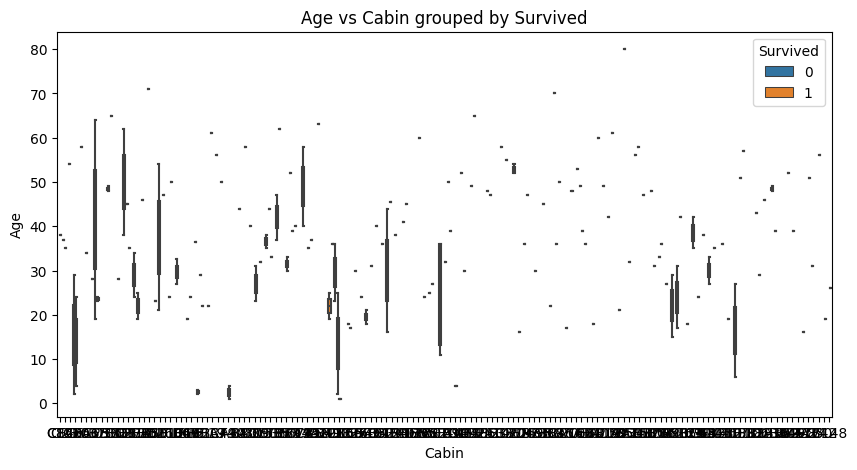

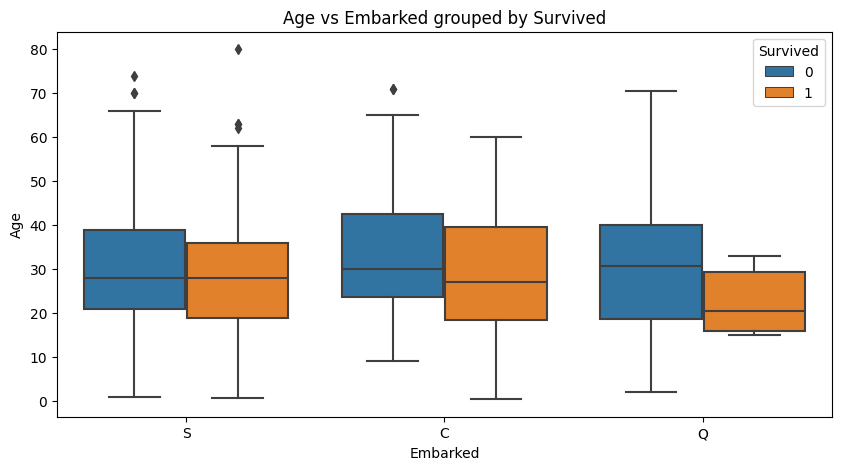

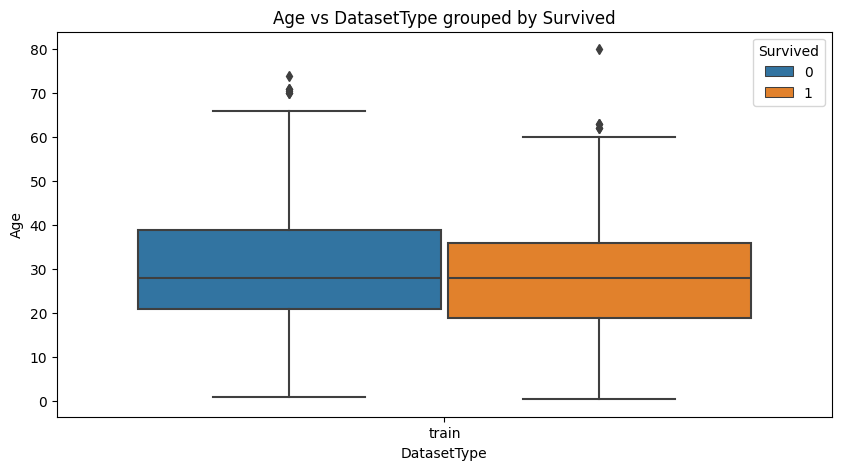

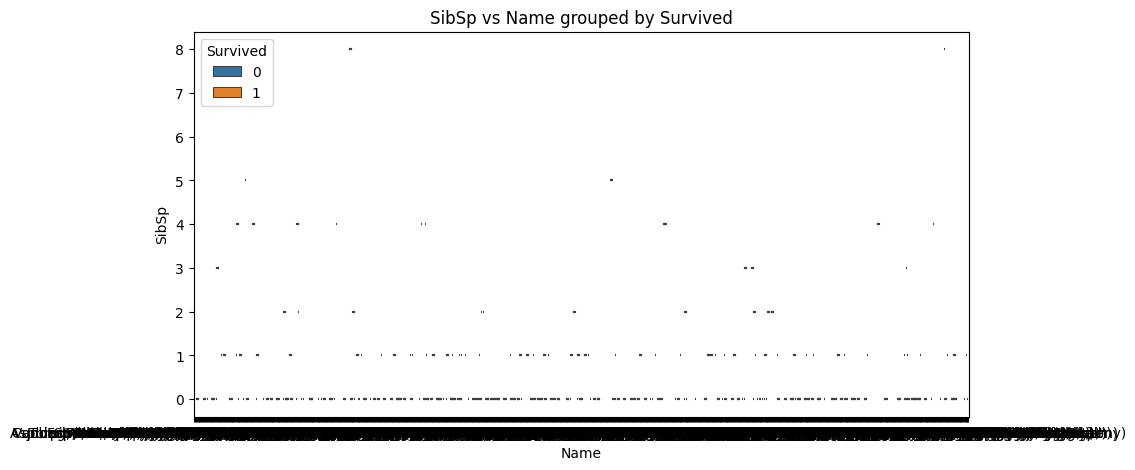

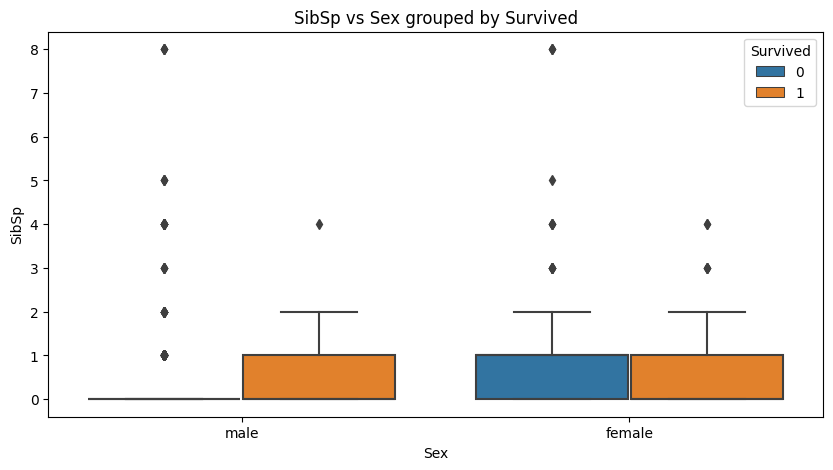

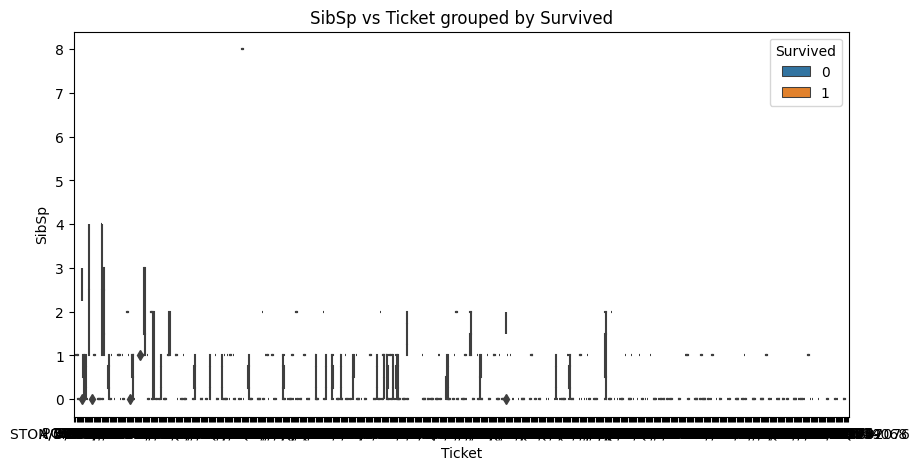

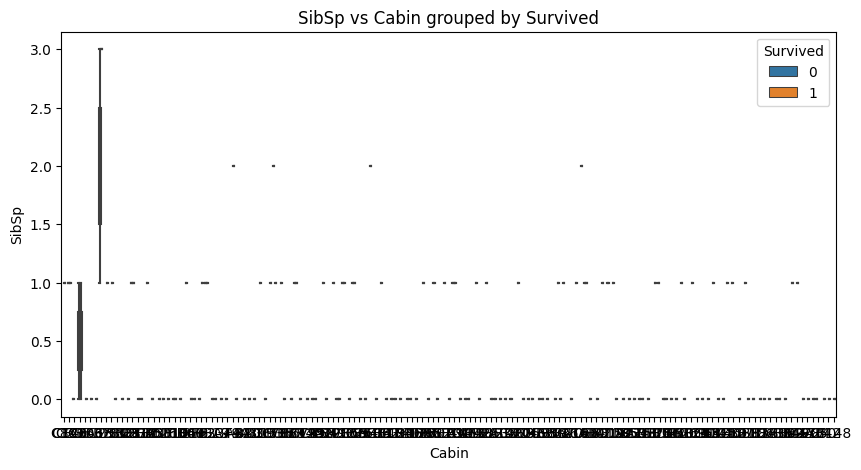

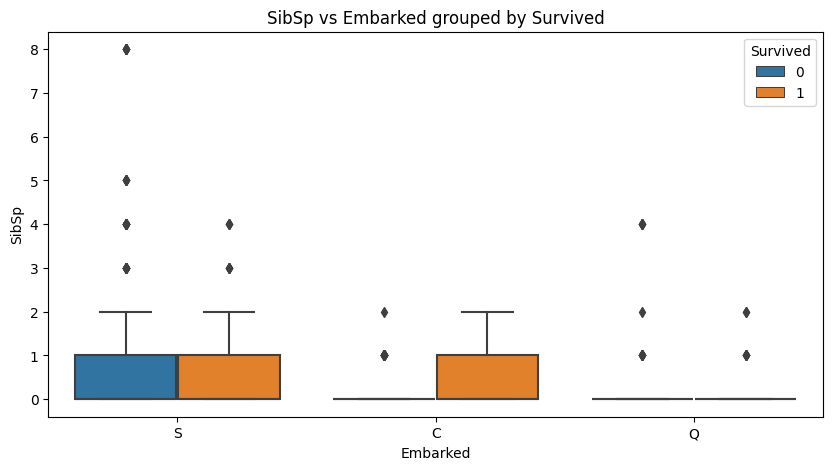

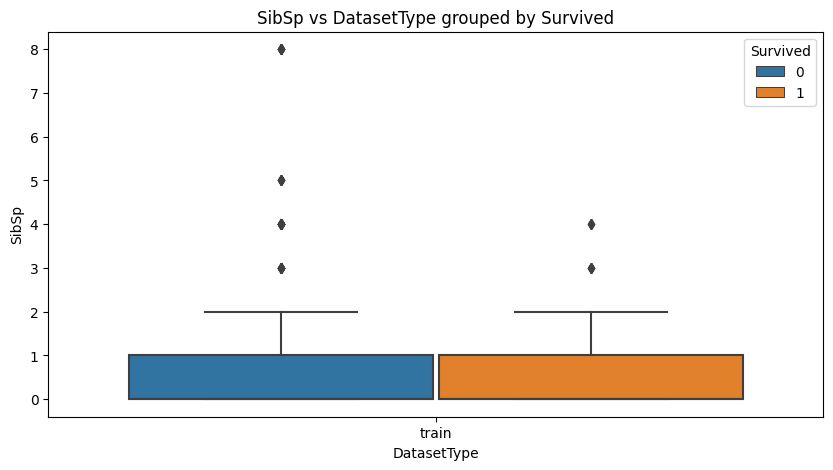

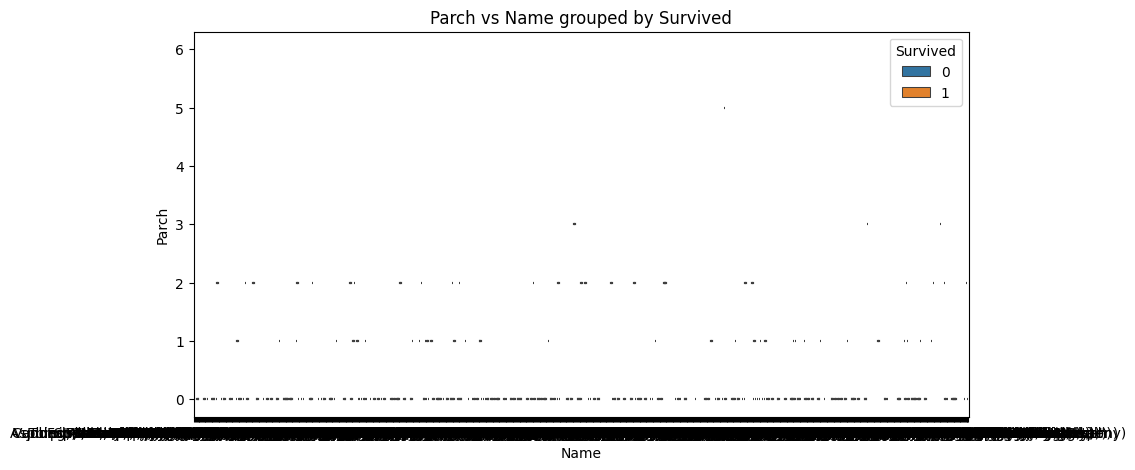

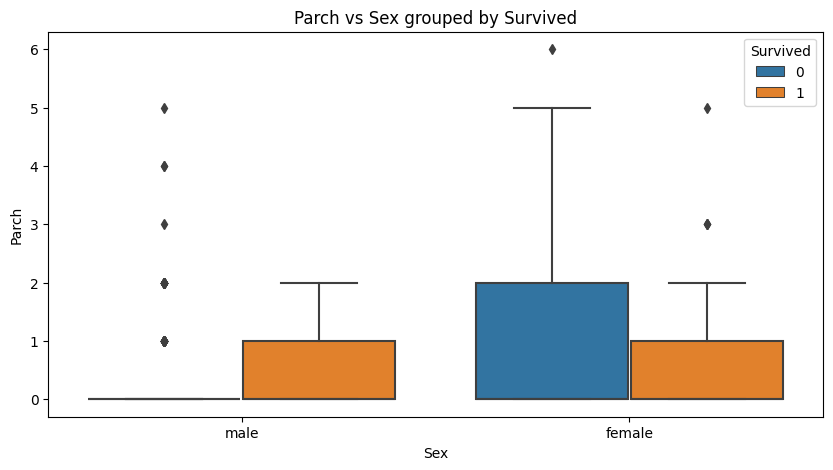

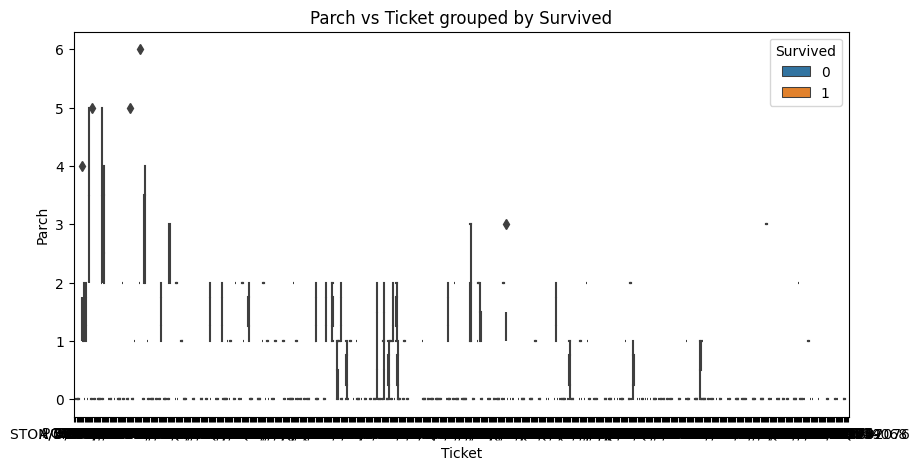

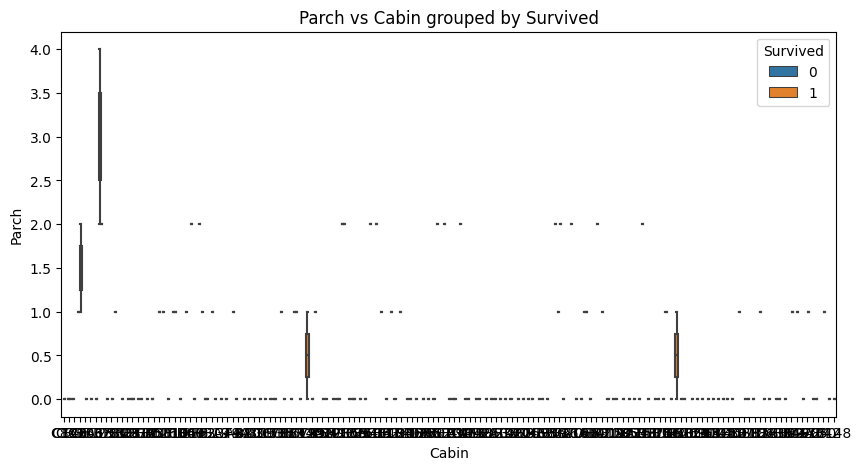

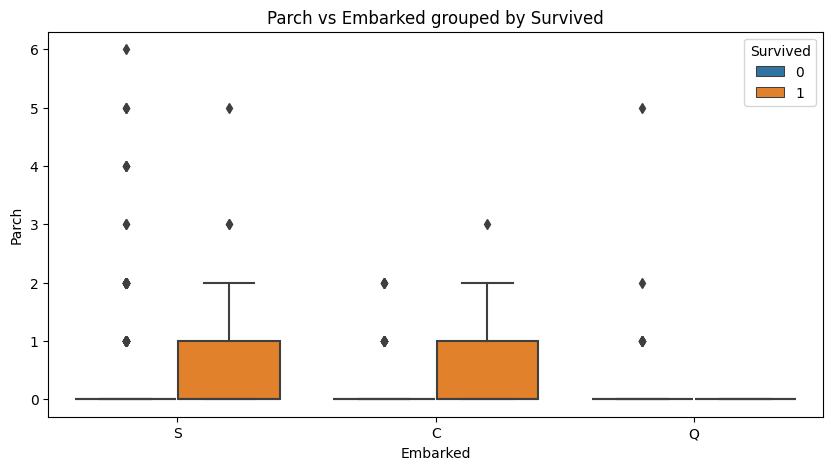

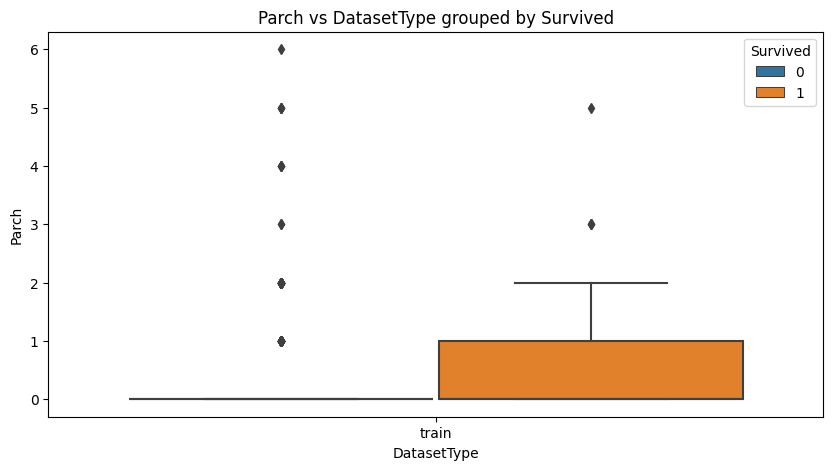

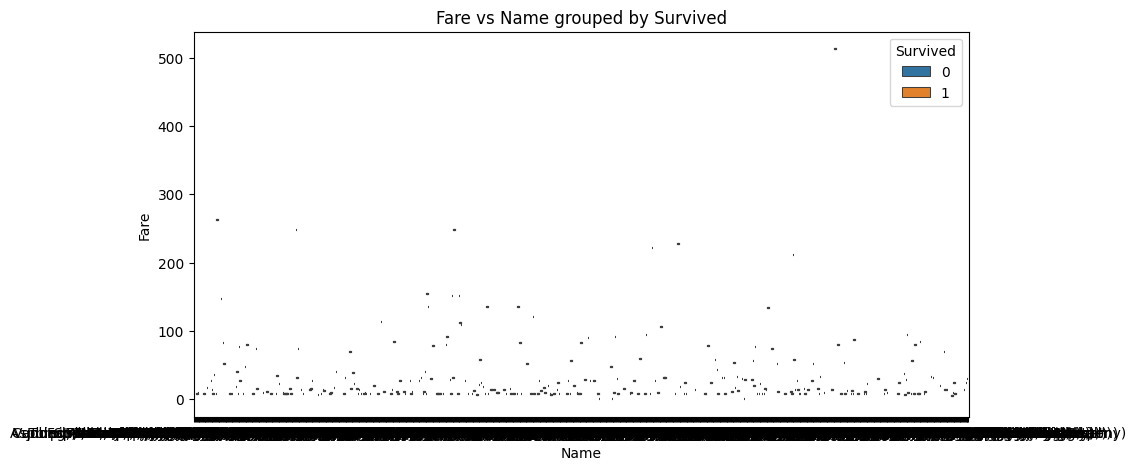

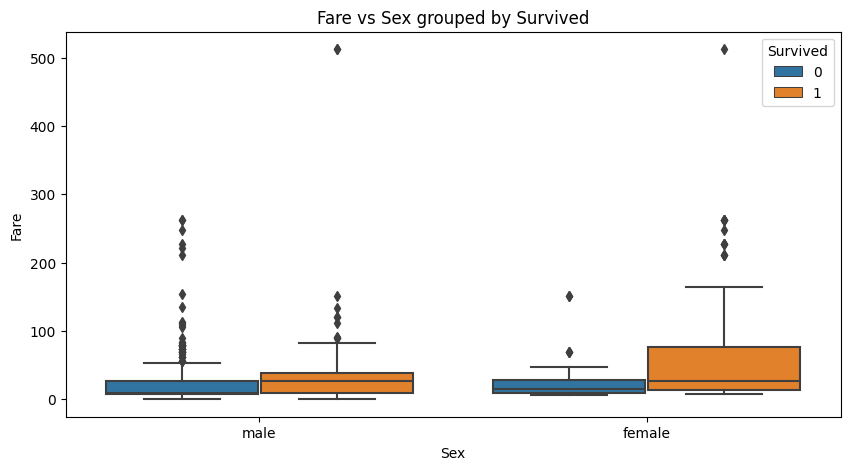

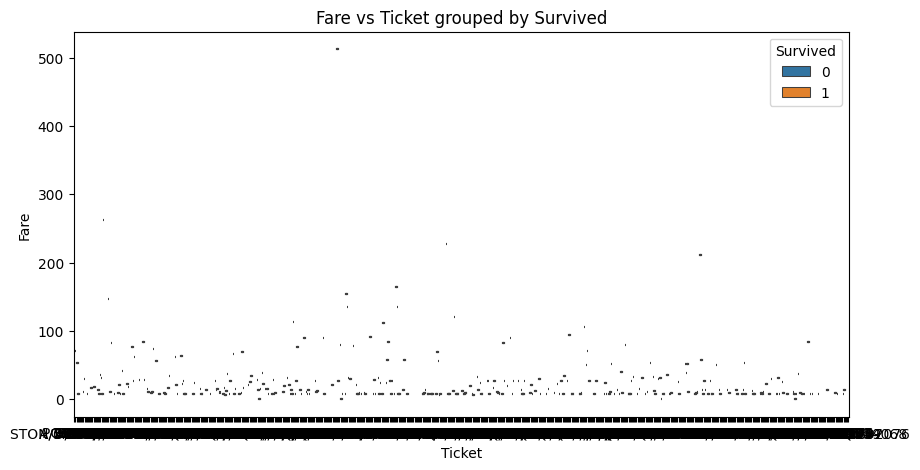

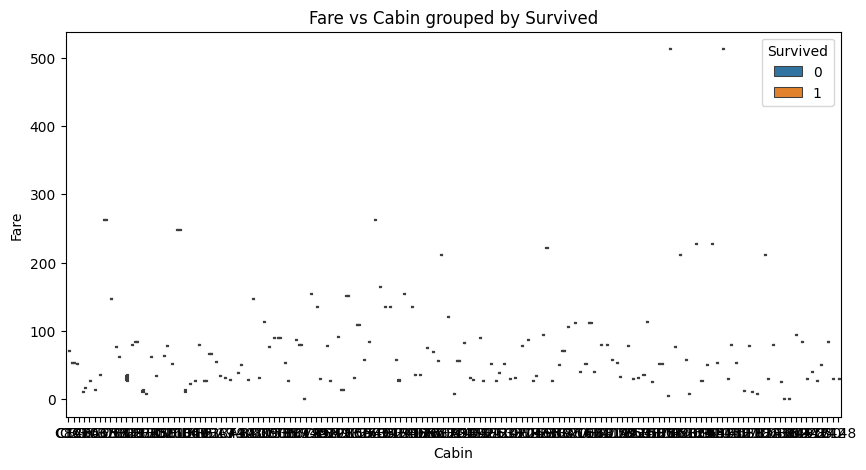

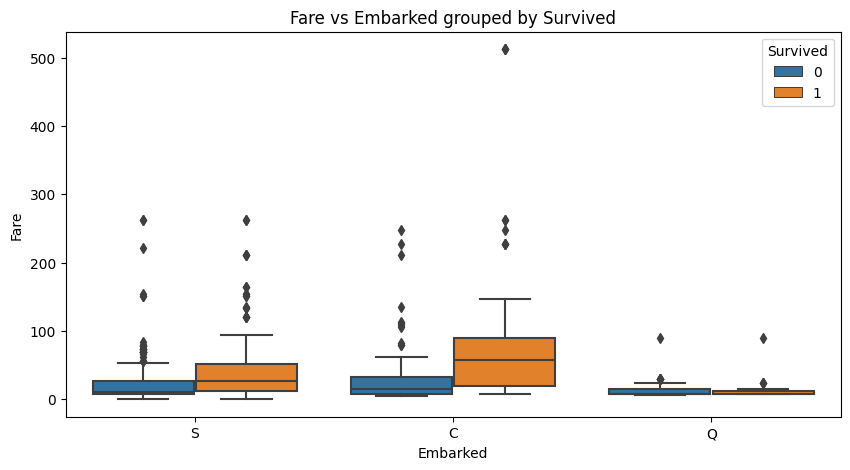

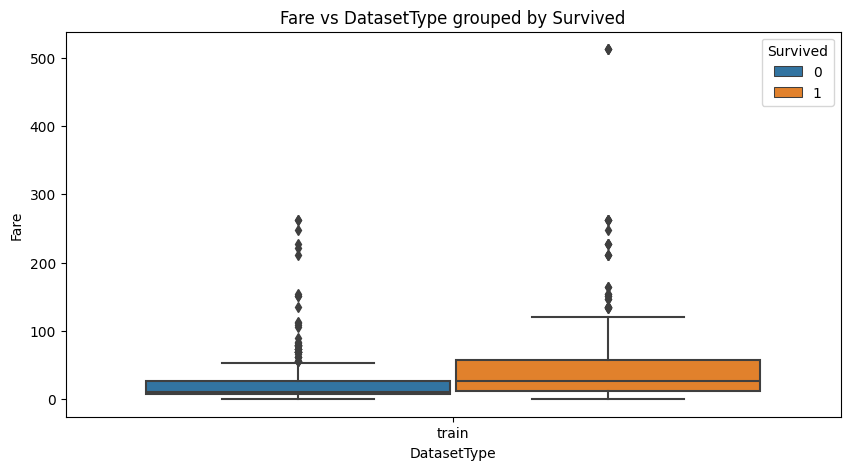

In [74]:
def bivariate_analysis(df, target):
    # Pairs of features (combination of numerical and categorical)
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    # Numerical vs Numerical
    for col1 in num_cols:
        for col2 in num_cols:
            if col1 != col2:
                plt.figure(figsize=(10, 5))
                sns.scatterplot(x=col1, y=col2, hue=target, data=df)
                plt.title(f'{col1} vs {col2} colored by {target}')
                plt.show()

    # Numerical vs Categorical
    for num_col in num_cols:
        for cat_col in cat_cols:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=cat_col, y=num_col, hue=target, data=df)
            plt.title(f'{num_col} vs {cat_col} grouped by {target}')
            plt.show()

bivariate_analysis(train_data, "Survived")

## Modeling

In [75]:
train_processed = combined_data[combined_data["DatasetType"] == "train"].drop(["DatasetType"], axis=1)
test_processed = combined_data[combined_data["DatasetType"] == "test"].drop(["DatasetType", "Survived"], axis=1)

In [76]:
from sklearn.model_selection import train_test_split
# Prepare data
X = train_processed.drop(["Survived", "Name", "Ticket", "Cabin", "Title", "AgeGroup"], axis=1)
y = train_processed["Survived"]
X_test = test_processed.drop(["Name", "Ticket", "Cabin", "Title", "AgeGroup"], axis=1)

# Train-Test Split for Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
pip install catboost

     ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/101.7 MB 1.5 MB/s eta 0:01:07
     ---------------------------------------- 0.2/101.7 MB 2.6 MB/s eta 0:00:39
     ---------------------------------------- 0.4/101.7 MB 3.2 MB/s eta 0:00:32
     ---------------------------------------- 0.6/101.7 MB 3.3 MB/s eta 0:00:31
     ---------------------------------------- 0.8/101.7 MB 3.6 MB/s eta 0:00:29
     ---------------------------------------- 1.1/101.7 MB 4.0 MB/s eta 0:00:25
     ---------------------------------------- 1.3/101.7 MB 4.0 MB/s eta 0:00:26
      --------------------------------------- 1.4/101.7 MB 4.0 MB/s eta 0:00:25
      --------------------------------------- 1.6/101.7 MB 4.2 MB/s eta 0:00:24
      --------------------------------------- 1.8/101.7 MB 4.1 MB/s eta 0:00:25
      --------------------------------------- 2.0/101.7 MB 4.2 MB/s eta 0:00:24
      --------------------------------------- 2


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train CatBoost Model
cat_features = X.select_dtypes(include=["object","category"]).columns.tolist()  # Categorical columns
catboost_model = CatBoostClassifier(iterations=7000, learning_rate=0.1, depth=6, random_state=42, verbose=100)

# Train the model
catboost_model.fit(X_train, y_train, cat_features=cat_features)

# Evaluate Model
y_pred = catboost_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


0:	learn: 0.6300281	total: 246ms	remaining: 28m 40s
100:	learn: 0.2472073	total: 6.73s	remaining: 7m 40s
200:	learn: 0.1602840	total: 12.2s	remaining: 6m 52s
300:	learn: 0.1100931	total: 17.6s	remaining: 6m 31s
400:	learn: 0.0783205	total: 22.8s	remaining: 6m 15s
500:	learn: 0.0602629	total: 28s	remaining: 6m 3s
600:	learn: 0.0476147	total: 33.2s	remaining: 5m 52s
700:	learn: 0.0389746	total: 38.4s	remaining: 5m 45s
800:	learn: 0.0321624	total: 43.7s	remaining: 5m 38s
900:	learn: 0.0281256	total: 48.9s	remaining: 5m 31s
1000:	learn: 0.0249547	total: 54.1s	remaining: 5m 24s
1100:	learn: 0.0214400	total: 59.3s	remaining: 5m 17s
1200:	learn: 0.0196531	total: 1m 4s	remaining: 5m 11s
1300:	learn: 0.0180111	total: 1m 9s	remaining: 5m 5s
1400:	learn: 0.0168647	total: 1m 15s	remaining: 5m
1500:	learn: 0.0153221	total: 1m 20s	remaining: 4m 54s
1600:	learn: 0.0144209	total: 1m 25s	remaining: 4m 48s
1700:	learn: 0.0134120	total: 1m 30s	remaining: 4m 42s
1800:	learn: 0.0126900	total: 1m 36s	remain

In [79]:
# Predict on Test Dataset
test_predictions = catboost_model.predict(test_processed.drop(["Name", "Ticket", "Cabin", "Title", "AgeGroup"], axis=1))

# Convert predictions to integers (to avoid float values like 1.0, 0.0)
test_predictions = test_predictions.astype(int)

# Create Submission File
submission = pd.DataFrame({"PassengerId": test_processed["PassengerId"], "Survived": test_predictions})
submission.to_csv("C:/Users/atalb/Documents/Coding/MLandAI/MLPracticeExercises/Datasets/Titanic/catboost_submission.csv", index=False)